# Introduction

What is the trigger that makes us think *hey, I like this person*? 

How do we see ourselves in appealing the interest of people of the opposite gender?

What makes us say *yes* to someone we met 4 minutes ago?

This notebook will use the data from the speed dating experiment to explore various ways of answering these questions. In doing so, we will observe how participants behaved and thought differently in relation with their gender or their race. We will see how different was the perception they had about themselves with respect to the one they had of the others. We will see how they, consciously or not, lie about their thoughts.

The journey to get to these answers will go through the following steps:
* **Who are the participants?** Age, gender, race, field of study, and more will be explored here, finding some unexpected differences in various segments of this sample of people.
* **Breaking the Waves**. The experimental settings (rules of the dating, rating system) changed across various sessions, can we spot differences in how people rated their partners or simply decided to say *yes* when the rules changes? (This section will be expanded further separately since it can be of interest in terms of questionnaire preparation issues)
* **Rating and deciding**. After 4 minutes talking with a stranger, each participant graded their experience and took a decision, what patterns were hiding in there?
* **Machines can love too**. Giving who you are and who you have in front, can a dumb heartless machine predict your decision? What do machines get right? What do they get wrong?

***Note***: I have no way to prove that this group of people is in any way representative of the population and we should all assume it isn't. For how careful I want to be in expressing myself in a way that takes into account this fact, from time to time, either to make the sentence more fluent or because I am lazy, I might say things like *Males likes watching sports on the tv more than Females*. For how true this statement is for the 850 people here, there is no scientific reason to assume that this works for all the males and females. In other words, the words *in this sample* are very much implied every single time.

In [1]:
# standard
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df_full = pd.read_csv('./dating.csv', encoding='ISO-8859-1')
df_full.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']

Before we begin, it is important to notice that each participants is in the DataFrame multiple times, once for each potential match. Thus an exploratory analysis on this dataset would be on 8378 individuals with many many repetitions. 

In other words, if I am White and I participate to a wave with 10 participants of the opposite gender, I count as 10 white people. This can **bias the analysis** and therefore I want to create a second DataFrame with only the unique entries, giving us the real number of participants: 551.

In [4]:
df = df_full[['iid', 'wave'] + personal + evaluation + outcome].drop_duplicates().copy()
df.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN
10,2,1,0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN
20,3,1,0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,0,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN
40,5,1,0,21.0,Law,1.0,NaN,NaN,NaN,2.0,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN


# Who are the participants?

Here, we explore the dataset in terms of those features that describe the participants. The goals are to get to know what is in this dataset and get some hints on what to focus on for further analysis.

These events were dedicated to partners of **opposite genders**. In particular, we have

In [5]:
df['gender'] = df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df.gender)
df_full['gender'] = df_full.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df_full.gender)
df.gender.value_counts(dropna=False)

Male      277
Female    274
Name: gender, dtype: int64

Slightly more males than females. Let's see if we can see some differences age-wise

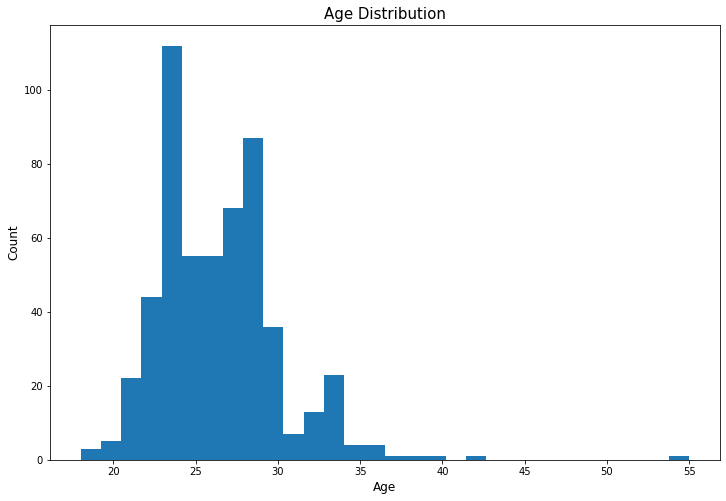

In [6]:
ax = df.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

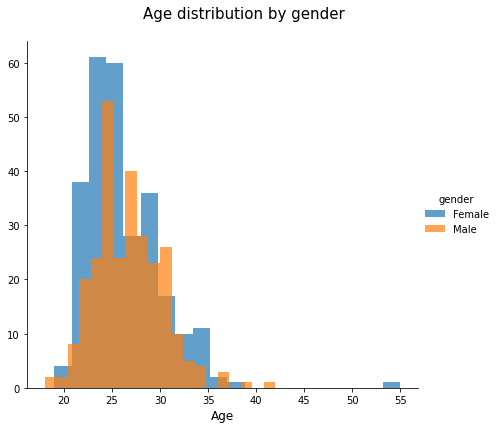

In [7]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
g.add_legend()

In [8]:
df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

The different count might be due to the presence of some *Na's* in the age feature

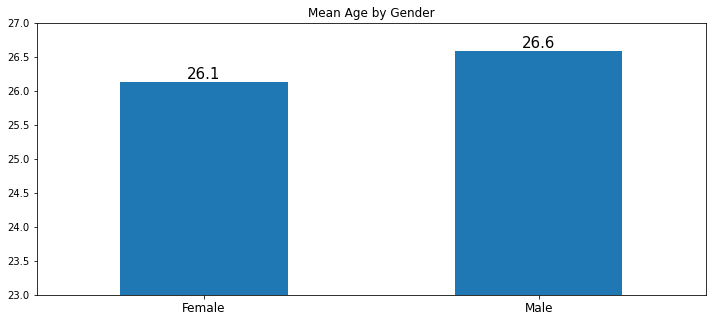

In [9]:
ax = df[['gender', 'age']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), legend=False, 
                                               title='Mean Age by Gender',
                                                   ylim=(23,27))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')

ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

There are no big differences in age, but we can see that the males at these events are slightly older than the female participants.

Next, we have information about the **race** of the participants.

In [10]:
df['race'] = df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df.race)
df_full['race'] = df_full.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df_full.race)
df_full['race_o'] = df_full.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df_full.race_o)
df.race.value_counts(dropna=False)

White       304
Asian       136
Hispanic     42
Other        37
Black        26
NaN           6
Name: race, dtype: int64

Mostly Caucasian participants, then Asian. It could either be a cultural thing or that these events were organized in specific areas with this demographic.

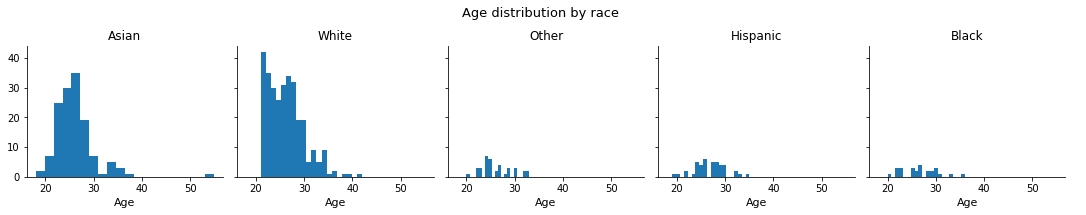

In [11]:
g = sns.FacetGrid(df, col='race', height=3)
g.map(plt.hist, 'age', bins=20)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

In [12]:
df[['race', 'age']].groupby('race').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
               mean median   min   max count
race                                        
Asian     26.198529   26.0  18.0  55.0   136
Black     26.692308   27.0  20.0  36.0    26
Hispanic  26.785714   27.0  19.0  35.0    42
Other     26.162162   25.0  20.0  33.0    37
White     26.367550   26.0  21.0  42.0   302

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


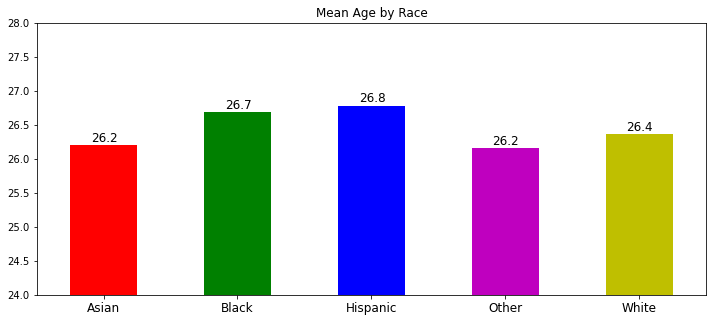

In [13]:
ax = df[['race', 'age']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Mean Age by Race',
                                                   ylim=(24,28), color='rgbmy')
ax.set_xticklabels(['Asian', 'Black', 'Hispanic',  'Other', 'White'], 
                   fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.155, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

The Asian participants are younger, while Black and Hispanic participants are older on average.

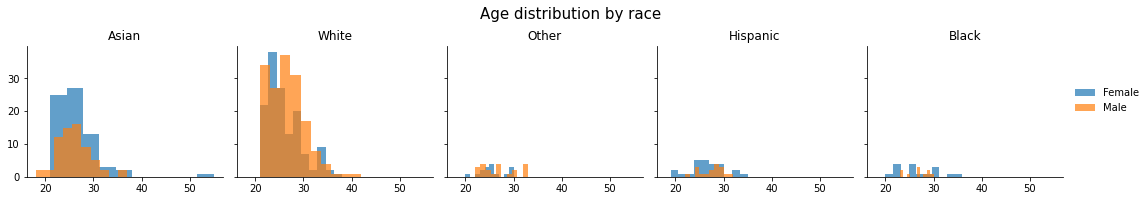

In [14]:
g = sns.FacetGrid(df, col='race', hue='gender')
g.map(plt.hist, 'age', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=15)

g._legend.set_title('')

In [15]:
df[['race','gender', 'age']].groupby(['race', 'gender'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

age                         
                      mean median   min   max count
race     gender                                    
Asian    Female  26.380282   26.0  21.0  55.0    71
         Male    26.000000   26.0  18.0  37.0    65
Black    Female  26.625000   26.0  20.0  36.0    16
         Male    26.800000   27.0  23.0  30.0    10
Hispanic Female  26.600000   26.0  19.0  35.0    25
         Male    27.058824   28.0  22.0  32.0    17
Other    Female  25.125000   25.0  20.0  30.0    16
         Male    26.952381   27.0  22.0  33.0    21
White    Female  25.971631   25.0  21.0  38.0   141
         Male    26.714286   27.0  21.0  42.0   161

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


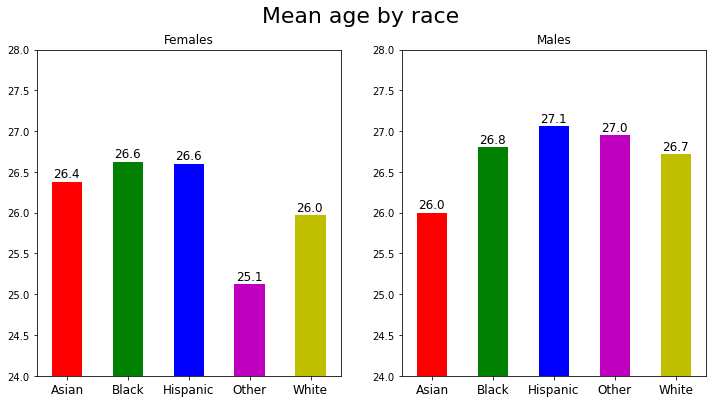

In [16]:
fig, ax= plt.subplots(1,2, figsize=(12, 6))

df[df.gender=='Female'][['race', 'age']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Females', ylim=(24,28),
                                                              color='rgbmy')

df[df.gender=='Male'][['race', 'age']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Males', ylim=(24,28),
                                                              color='rgbmy')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('',fontsize=1)
ax[1].set_xlabel('',fontsize=1)

fig.suptitle('Mean age by race', fontsize=22)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.02, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.02, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

For Caucasians (and "Other" race), more males than females, while we have the opposite trend for every other race. Moreover, for these 2 races, we can observe that males tend to be much older on average. Asian females are older than their male counterpart.

We can now look at what the participants are **studying**.

In [17]:
df['field_cd'] = df.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df.field_cd)
df_full['field_cd'] = df_full.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df_full.field_cd)
df.field_cd.value_counts(dropna=False)

Econ        130
Nat. Sc.     61
Eng.         56
Law          48
Soc. Sc.     46
Pol. Sc.     46
Educ.        40
Soc. Wr.     30
Journ.       21
Hist.        17
Math         14
Arts         11
Med. Sc.      9
Film          7
NaN           7
Lang.         3
Oth.          3
Und.          1
Arch.         1
Name: field_cd, dtype: int64

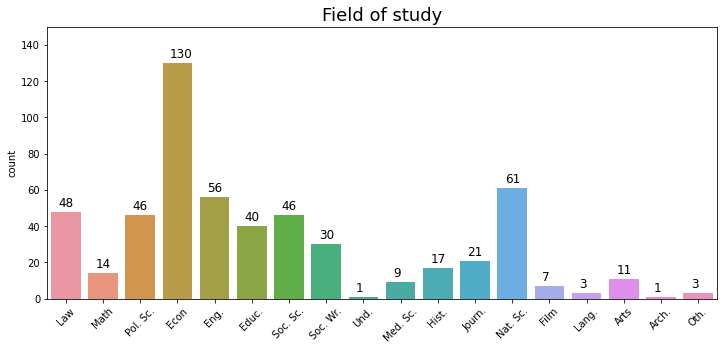

In [18]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="field_cd", data=df)
plt.title('Field of study', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.ylim(0, 150)
plt.xlabel('')

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

A great majority of business/finance/econ, followed by Natural Sciences (chemistry, physics) and Engineering. All of them very much male-dominated.

Text(0.5, 0, '')

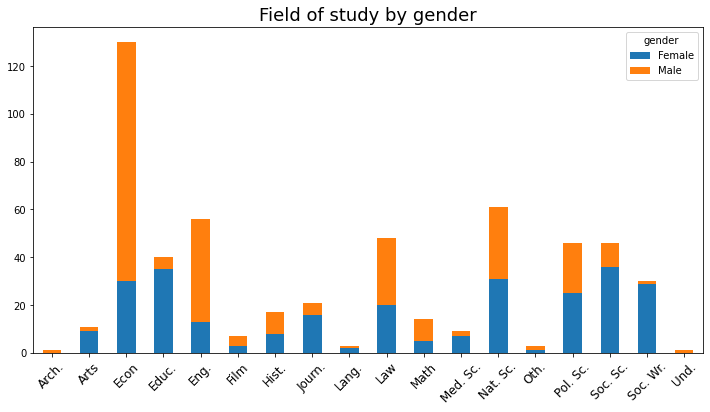

In [19]:
tmp = df[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
ax = tmp.plot(kind='bar', figsize=(12,6), stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Field of study by gender', fontsize=18)
ax.set_xlabel('',fontsize=1)

In [20]:
tmp = df[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
tmp['% Female'] = round(tmp.Female / (tmp.Female + tmp.Male) * 100, 2)
tmp['% Male'] = round(tmp.Male / (tmp.Female + tmp.Male) * 100, 2)
tmp

gender,Female,Male,% Female,% Male
field_cd,,,,
Arch.,0.0,1.0,0.00,100.00
Arts,9.0,2.0,81.82,18.18
Econ,30.0,100.0,23.08,76.92
Educ.,35.0,5.0,87.50,12.50
Eng.,13.0,43.0,23.21,76.79
Film,3.0,4.0,42.86,57.14
Hist.,8.0,9.0,47.06,52.94
Journ.,16.0,5.0,76.19,23.81
Lang.,2.0,1.0,66.67,33.33


While Engineering, Finance, and Math are mostly male-dominated, Social and Medical Sciences, Arts, and Journalism are more female dominated. Natural Sciences, Political Science, and Film are very much equally represented by both genders.

## Do we care about race and religion?

In this subsection, we will focus on what the participants declare to be the level of importance of race and religion for them. Thus, let's keep in mind that this is what the participants are declaring, which **does not necessarily correspond to the truth**. 

Later, we will look for a way to test if these values are trustworthy or not.

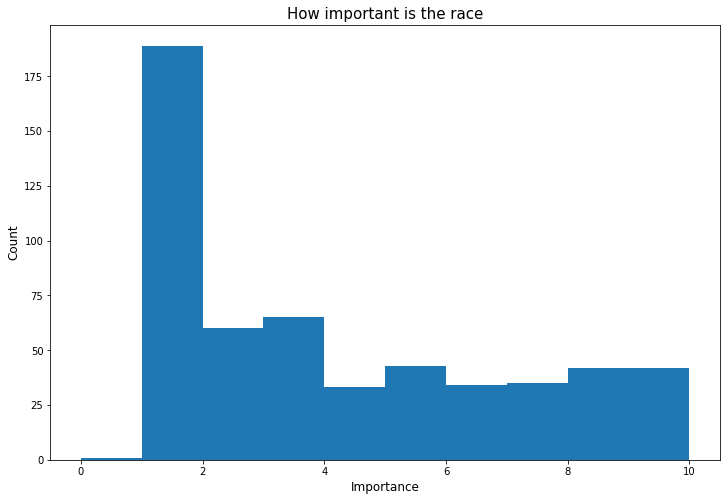

In [21]:
ax = df.imprace.hist(bins=10, figsize=(12,8))
ax.set_title('How important is the race', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

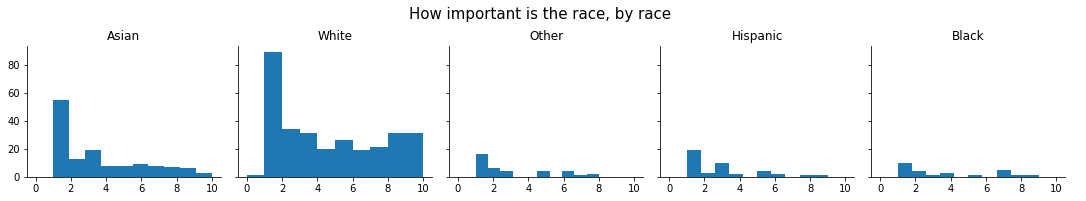

In [22]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()

In [23]:
df[['race', 'imprace']].groupby(['race']).agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
              mean median  min   max count
race                                      
Asian     3.382353    2.5  1.0  10.0   136
Black     3.461538    2.0  1.0   9.0    26
Hispanic  2.666667    2.0  1.0   9.0    42
Other     2.891892    2.0  1.0   8.0    37
White     4.165017    3.0  0.0  10.0   303

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


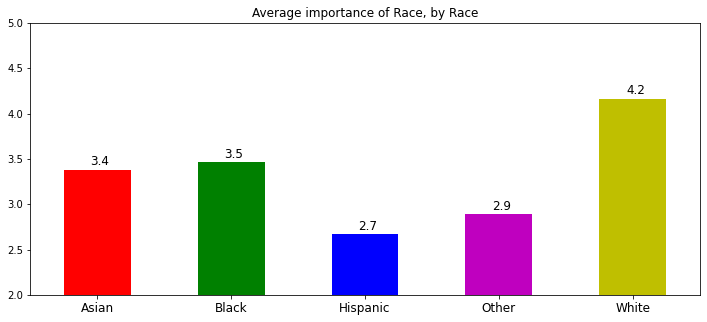

In [24]:
ax = df[['race', 'imprace']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Average importance of Race, by Race',
                                                   ylim=(2,5), color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Caucasians give more importance to race than other races. One may wonder if gender plays a role in that

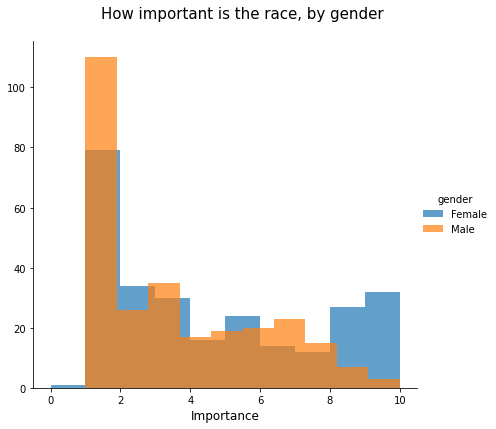

In [25]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'imprace', alpha= 0.7, bins=10)
g.set_xlabels('Importance', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How important is the race, by gender', fontsize=15)
g.add_legend()

In [26]:
df[['gender', 'imprace']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
            mean median  min   max count
gender                                  
Female  4.115242    3.0  0.0  10.0   269
Male    3.360000    3.0  1.0  10.0   275

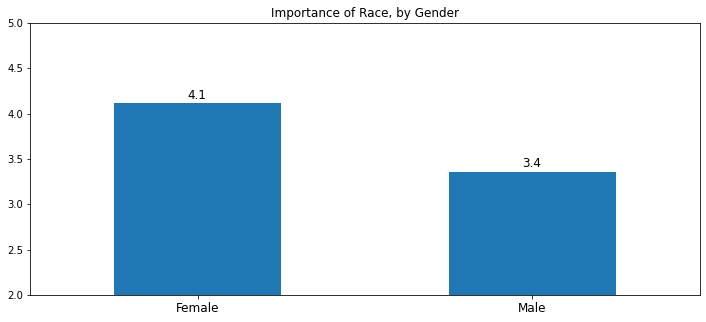

In [27]:
ax = df[['gender', 'imprace']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Importance of Race, by Gender',
                                                   ylim=(2,5))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.22, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Females declare to care about race more than males. However, something interesting happens if we put race into the mix again.

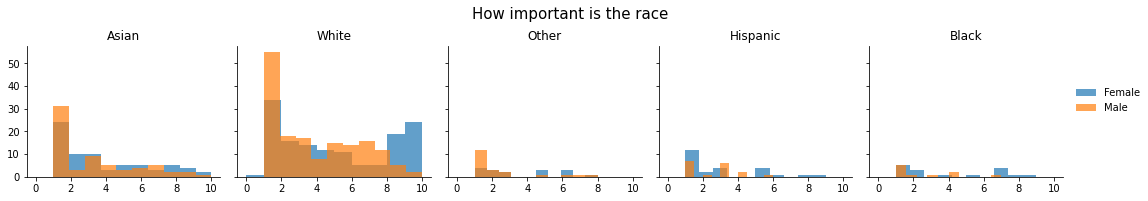

In [28]:
g = sns.FacetGrid(df, col='race', hue='gender')
g.map(plt.hist, 'imprace', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race', fontsize=15)

g._legend.set_title('')

In [29]:
df[['gender', 'race', 'imprace']].groupby(['gender', 'race'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
                     mean median  min   max count
gender race                                      
Female Asian     3.633803    3.0  1.0  10.0    71
       Black     4.062500    3.0  1.0   9.0    16
       Hispanic  2.840000    2.0  1.0   9.0    25
       Other     3.562500    3.0  1.0   8.0    16
       White     4.652482    4.0  0.0  10.0   141
Male   Asian     3.107692    2.0  1.0  10.0    65
       Black     2.500000    1.5  1.0   7.0    10
       Hispanic  2.411765    3.0  1.0   6.0    17
       Other     2.380952    1.0  1.0   8.0    21
       White     3.740741    3.0  1.0  10.0   162

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


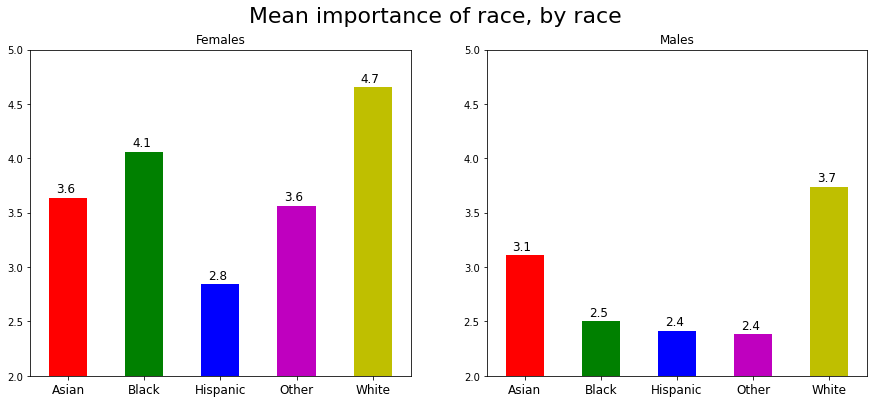

In [30]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df[df.gender=='Female'][['race', 'imprace']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Females', ylim=(2,5),
                                                              color='rgbmy')

df[df.gender=='Male'][['race', 'imprace']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Males', ylim=(2,5),
                                                              color='rgbmy')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('',fontsize=1)
ax[1].set_xlabel('',fontsize=1)

fig.suptitle('Mean importance of race, by race', fontsize=22)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.09, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.09, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

This value seems to be very influenced by the gender of the participant consistently across all the races, with Caucasian females declaring the highest value and Black (and 'Other') participants with the highest gap between Males and Females. 

Next, we can focus on how important is the **religion**.

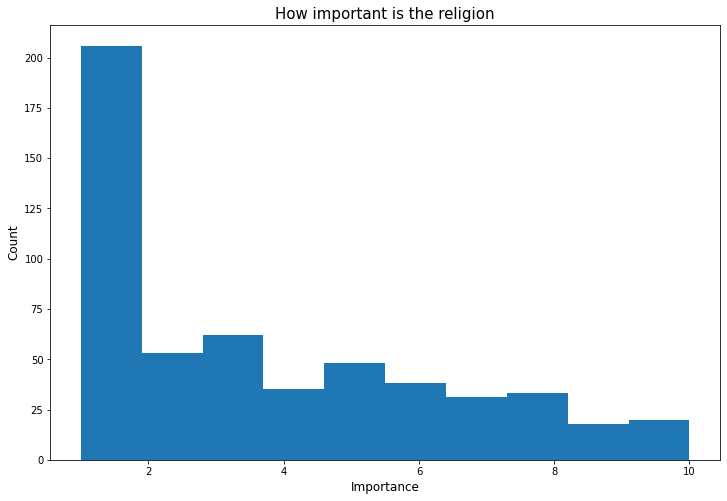

In [31]:
ax = df.imprelig.hist(bins=10, figsize=(12,8))
ax.set_title('How important is the religion', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

Text(0.5, 0.98, 'How important is the religion, by race')

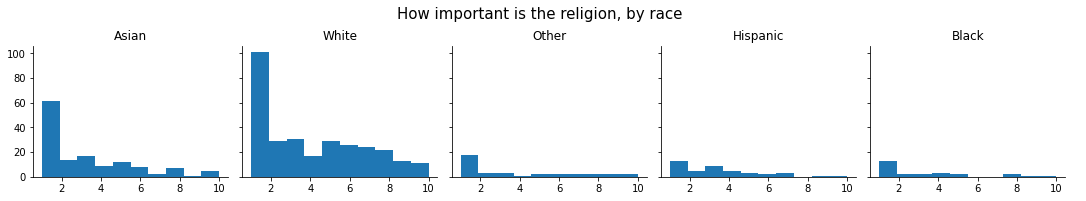

In [32]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprelig', bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the religion, by race', fontsize=15)

In [33]:
df[['race', 'imprelig']].groupby(['race']).agg(['mean', 'median', 'min', 'max', 'count'])

imprelig                        
              mean median  min   max count
race                                      
Asian     3.036765    2.0  1.0  10.0   136
Black     3.076923    1.5  1.0  10.0    26
Hispanic  3.261905    3.0  1.0  10.0    42
Other     3.432432    2.0  1.0  10.0    37
White     3.933993    3.0  1.0  10.0   303

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


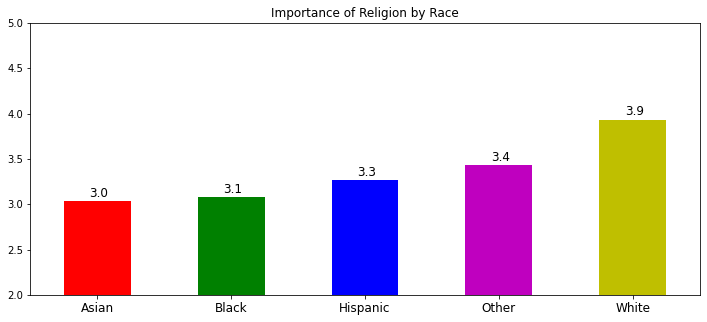

In [34]:
ax = df[['race', 'imprelig']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Importance of Religion by Race',
                                                   ylim=(2,5), color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Again, we see that white participants declare higher values.

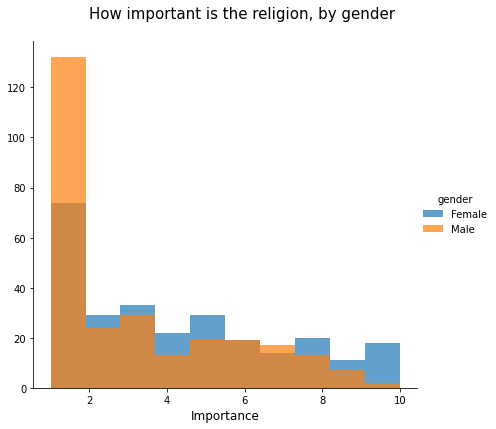

In [35]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'imprelig', alpha= 0.7, bins=10)
g.set_xlabels('Importance', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How important is the religion, by gender', fontsize=15)
g.add_legend()

In [36]:
df[['gender', 'imprelig']].groupby(['gender'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

imprelig                        
            mean median  min   max count
gender                                  
Female  4.144981    3.0  1.0  10.0   269
Male    3.032727    2.0  1.0  10.0   275

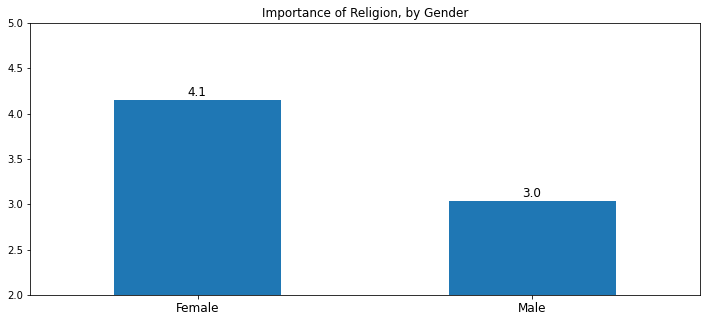

In [37]:
ax = df[['gender', 'imprelig']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Importance of Religion, by Gender',
                                                   ylim=(2,5))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.22, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Again, female participants are declaring higher values

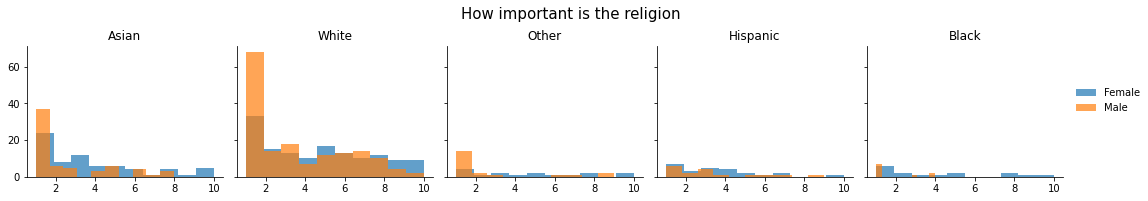

In [38]:
g = sns.FacetGrid(df, col='race', hue='gender')
g.map(plt.hist, 'imprelig', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the religion', fontsize=15)

g._legend.set_title('')

In [39]:
df[['gender', 'race', 'imprelig']].groupby(['gender', 'race'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

imprelig                        
                     mean median  min   max count
gender race                                      
Female Asian     3.549296    3.0  1.0  10.0    71
       Black     3.875000    2.5  1.0  10.0    16
       Hispanic  3.360000    3.0  1.0  10.0    25
       Other     4.687500    4.5  1.0  10.0    16
       White     4.553191    4.0  1.0  10.0   141
Male   Asian     2.476923    1.0  1.0   8.0    65
       Black     1.800000    1.0  1.0   4.0    10
       Hispanic  3.117647    3.0  1.0   9.0    17
       Other     2.476190    1.0  1.0   9.0    21
       White     3.395062    2.0  1.0  10.0   162

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


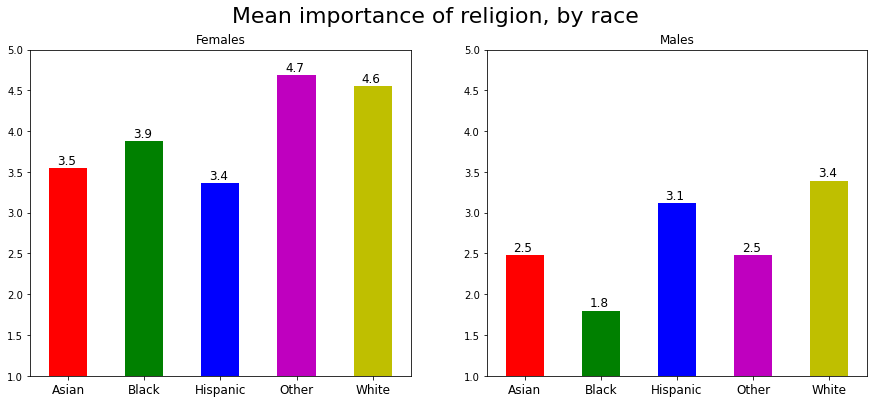

In [40]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df[df.gender=='Female'][['race', 'imprelig']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Females', ylim=(1,5),
                                                              color='rgbmy')

df[df.gender=='Male'][['race', 'imprelig']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Males', ylim=(1,5),
                                                              color='rgbmy')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

fig.suptitle('Mean importance of religion, by race', fontsize=22)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.1, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.1, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Thus, in general, Caucasian (and "Other") females declare to give more importance to race and religion than any other segment of the population. It is difficult to not notice how these differences between gender vary across the races. We notice again a big gap across gender in Black participants and in participants of 'Other' races. At last, it seems that Hispanic individuals are fairly united in giving importance to religion (on average), regardless of their gender.

## Are we sincere about it?

We could try to find a way to check whether or not the participants are declaring what they really feel. In particular, they are asked to communicate if they like their speed-date or not (as far as I understood, if they both like each other we call this a match). Although this might depend on many factors, we could try to see if the values we found above are trustworthy.

Since the data with the decisions are in the DataFrame with the repeated individuals (the original one), the next cell will prepare the data by counting how many times an individual gave positive feedback and how many times it was with a partner of the same race. 

It is easy (sums are associative) to see that the same results can be achieved by simply using the original DataFrame but it is a good exercise of data manipulation that I want to keep in the next hidden cell.

In [41]:
sinc = df_full[['iid', 'dec', 'samerace']].groupby(['iid', 'samerace']).sum().unstack().fillna(0)
sinc = sinc.dec.rename(columns={0: 'dec_diff', 1: 'dec_same'})
tmp = df_full[['iid', 'wave', 'samerace']].groupby(['iid', 'samerace']).count().unstack().fillna(0)
tmp = tmp.wave.rename(columns={0: 'dates_diff', 1: 'dates_same'})
sinc = pd.merge(sinc, tmp, left_index=True, right_index=True)
sinc = sinc.reset_index()
df = pd.merge(df, sinc, on='iid')
del sinc

In [42]:
tmp = (df.dec_diff.sum() + df.dec_same.sum()) / (df.dates_diff.sum() + df.dates_same.sum())
print('Rate of positive feedback on the partner: {}%'.format(round(tmp*100,2)))
tmp = (df.dec_same.sum()) / (df.dates_same.sum())
print('Rate of positive feedback on the partner of the same race: {}%'.format(round(tmp*100,2)))
tmp = (df.dec_diff.sum()) / (df.dates_diff.sum())
print('Rate of positive feedback on the partner of the a different race: {}%'.format(round(tmp*100,2)))

Rate of positive feedback on the partner: 41.99%
Rate of positive feedback on the partner of the same race: 43.4%
Rate of positive feedback on the partner of the a different race: 41.07%


It looks like there is some influence after all, let's try to go deeper.

In [43]:
print('Rate of positive feedback on the partner of the same race, by race')
df_full[['dec','samerace', 'race']].groupby(['race','samerace']).mean()*100

Rate of positive feedback on the partner of the same race, by race


dec
race     samerace           
Asian    0         46.870839
         1         43.750000
Black    0         49.502488
         1         77.777778
Hispanic 0         39.869281
         1         48.076923
Other    0         50.000000
         1         45.238095
White    0         33.549675
         1         42.988253

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
<ipython-input-44-31eb929ac947>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
<ipython-input-44-31eb929ac947>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

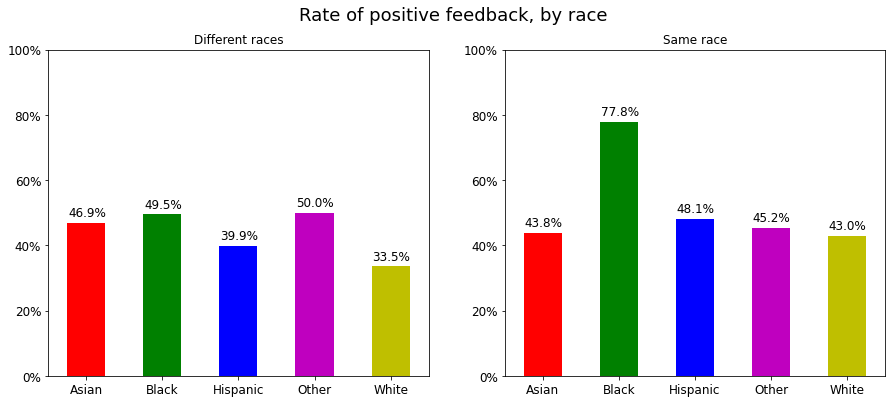

In [44]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df_full[df_full.samerace==0][['race', 'dec']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Different races', ylim=(0,1),
                                                              color='rgbmy')

df_full[df_full.samerace==1][['race', 'dec']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Same race', ylim=(0,1),
                                                              color='rgbmy')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

fig.suptitle('Rate of positive feedback, by race', fontsize=18)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

Every race, except for Asians and "Other" (which can include same race couples and we have no way to find out), sees a positive effect of being of the same race. Particularly impressive the effect on Black participants but we can't ignore that there are very few cases when 2 black individuals dated at these events.

In [45]:
print('Rate of positive feedback on the partner of the same race, by gender')
df_full[['dec','samerace', 'gender']].groupby(['gender','samerace']).mean()*100

Rate of positive feedback on the partner of the same race, by gender


dec
gender samerace           
Female 0         34.718923
       1         39.324487
Male   0         47.397476
       1         47.466828

This looks like more in line with what was declared: the effect for males is negligible and more noticeable for females.

<ipython-input-46-5124de277d9b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
<ipython-input-46-5124de277d9b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)


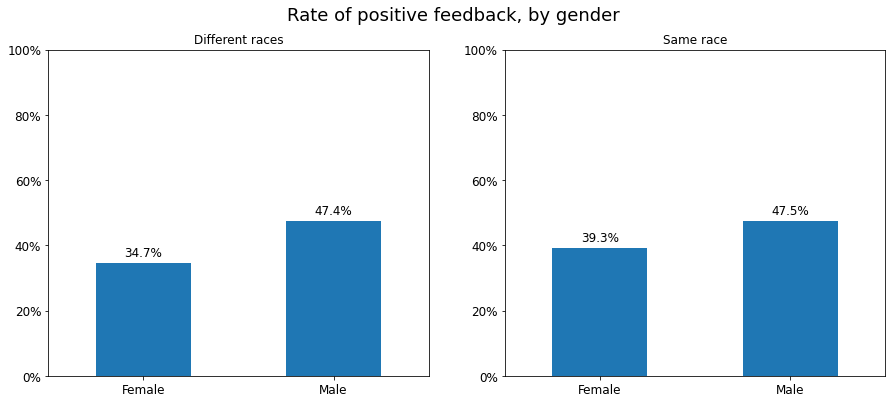

In [46]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df_full[df_full.samerace==0][['gender', 'dec']].groupby('gender').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Different races', ylim=(0,1))

df_full[df_full.samerace==1][['gender', 'dec']].groupby('gender').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Same race', ylim=(0,1))

ax[0].set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

fig.suptitle('Rate of positive feedback, by gender', fontsize=18)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.15, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.15, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  retu

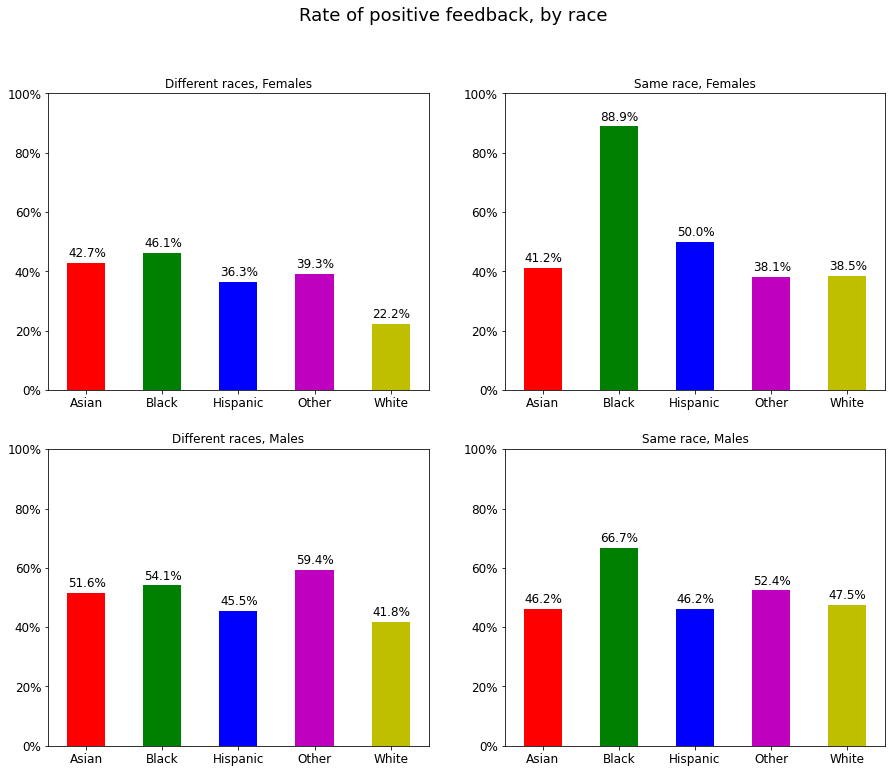

In [47]:
fig, ax= plt.subplots(2,2, figsize=(15, 12))

df_full[(df_full.samerace==0) & (df_full.gender=='Female')][['race', 
                                       'dec']].groupby('race').mean().plot(kind='bar', ax=ax[0][0], legend=False,
                                                              title='Different races, Females', ylim=(0,1),
                                                              color='rgbmy')

df_full[(df_full.samerace==1) & (df_full.gender=='Male')][['race', 
                                        'dec']].groupby('race').mean().plot(kind='bar', ax=ax[1][1], legend=False,
                                                              title='Same race, Males', ylim=(0,1),
                                                              color='rgbmy')

df_full[(df_full.samerace==0) & (df_full.gender=='Male')][['race', 
                                       'dec']].groupby('race').mean().plot(kind='bar', ax=ax[1][0], legend=False,
                                                              title='Different races, Males', ylim=(0,1),
                                                              color='rgbmy')

df_full[(df_full.samerace==1) & (df_full.gender=='Female')][['race', 
                                        'dec']].groupby('race').mean().plot(kind='bar', ax=ax[0][1], legend=False,
                                                              title='Same race, Females', ylim=(0,1),
                                                              color='rgbmy')

ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0][0].set_xlabel('')
ax[1][0].set_xlabel('')
ax[0][1].set_xlabel('')
ax[1][1].set_xlabel('')
vals = ax[0][0].get_yticks()
ax[0][0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1][0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[0][1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1][1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

fig.suptitle('Rate of positive feedback, by race', fontsize=18)

for i in ax[0][0].patches:
    ax[0][0].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1][0].patches:
    ax[1][0].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[0][1].patches:
    ax[0][1].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1][1].patches:
    ax[1][1].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

Now, this is interesting. We have seen that Females are less likely to give positive feedback (meaning, setting `dec=1`) than males. This is very evident in Caucasian females with a partner of a different race. This is very much in line with what was declared in the other question.

We have already noticed the high discrepancy between the declared importance and the feedback rate for Black individuals and this is again very evident for African American females since it appears they particularly liked the partners of the same race at the point that their rate is significantly higher than their male counterparts (as before, this happens only in a very few cases). A similar effect (but much smaller) can be observed for Hispanic participants.

For how interesting this is for me, **this result does not mean much in terms of causality**. There can be more important factors determining this kind of choice and we are looking at averages, thus smoothing out any kind of variability.

Before moving on, we can see how being of the same race has a positive effect regardless of what the individuals are declaring it important or not. Moreover, the effect is particularly large if the race is considered a very important factor.

<ipython-input-48-2b8af5a4c7c9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
<ipython-input-48-2b8af5a4c7c9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)


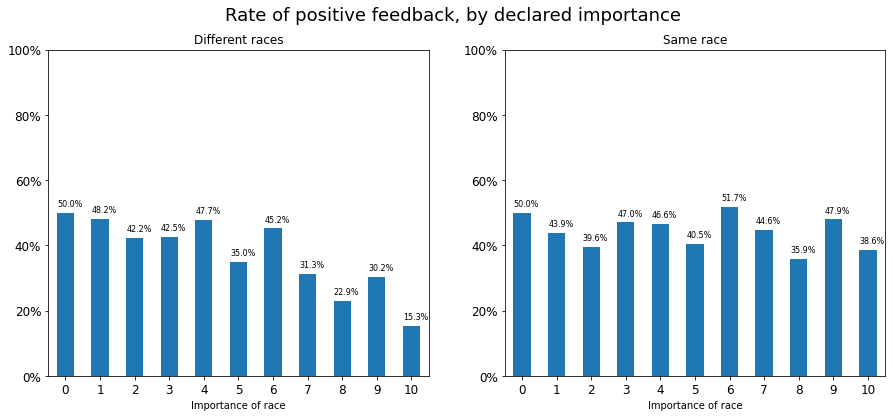

In [48]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df_full[df_full.samerace==0][['imprace', 
                              'dec']].groupby('imprace').mean().unstack().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Different races', ylim=(0,1))

df_full[df_full.samerace==1][['imprace', 
                              'dec']].groupby('imprace').mean().unstack().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Same race', ylim=(0,1))

vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax[0].set_xticklabels(np.arange(11), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(np.arange(11), fontsize=12, rotation='horizontal')

ax[0].set_xlabel('Importance of race')
ax[1].set_xlabel('Importance of race')

fig.suptitle('Rate of positive feedback, by declared importance', fontsize=18)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.005, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=8)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.005, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=8)

## Goals and habits

In this subsection, we will see what the participants declared to be their intentions to be and what they usually do in terms of going out and dating.

In [49]:
df['goal'] = df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df.goal)
df_full['goal'] = df_full.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df_full.goal)
df.goal.value_counts(dropna=False)

Fun             228
Meet            189
Date             40
IdidIt           35
Other            30
Relationship     22
NaN               7
Name: goal, dtype: int64

Most of the people declare to be there to have fun and meet new people. Let's see if there is some trend in gender or race.

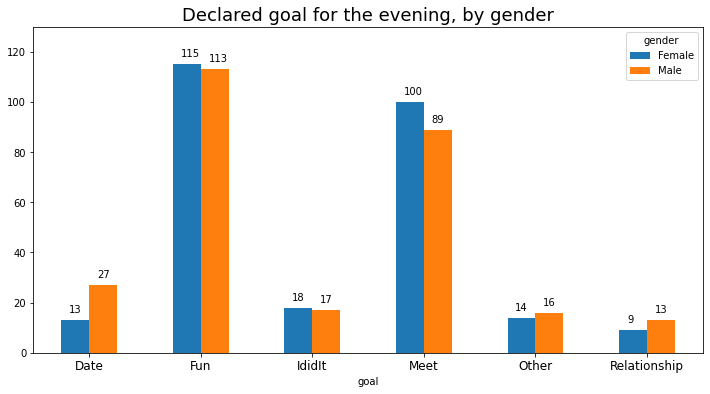

In [50]:
tmp = df[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,130))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Declared goal for the evening, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=10)

The two genders mainly differ in their intentions about finding a date (twice as many more males declare that) or meeting someone new (it turns out that girls do not *just want to have fun* but also want to meet someone new).

Let's see how often they declare to **go out**.

In [51]:
df['go_out'] = df.go_out.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                             4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                             7: 'Almost_never'}).fillna(df.go_out)
df_full['go_out'] = df_full.go_out.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                             4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                             7: 'Almost_never'}).fillna(df_full.go_out)
df.go_out.value_counts(dropna=False)

Twice_pw        191
Several_pw      177
Once_pw         127
Twice_pm         29
Once_pm          12
NaN               7
Several_py        6
Almost_never      2
Name: go_out, dtype: int64

In [52]:
pd.crosstab(df.go_out, df.goal, normalize='index')

goal,Date,Fun,IdidIt,Meet,Other,Relationship
go_out,,,,,,
Almost_never,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Once_pm,0.000000,0.333333,0.166667,0.250000,0.083333,0.166667
Once_pw,0.078740,0.401575,0.062992,0.362205,0.047244,0.047244
Several_pw,0.062147,0.446328,0.073446,0.322034,0.062147,0.033898
Several_py,0.166667,0.166667,0.000000,0.333333,0.000000,0.333333
Twice_pm,0.068966,0.310345,0.034483,0.517241,0.068966,0.000000
Twice_pw,0.083770,0.439791,0.057592,0.335079,0.052356,0.031414


* Most of the people declare to go out on a weekly basis and they are mostly here to have fun.
* Both the participants that declared to almost never go out were there to meet someone new.
* Participants going out on a yearly basis are in proportion more interested in finding a date or a serious relationship than the others.

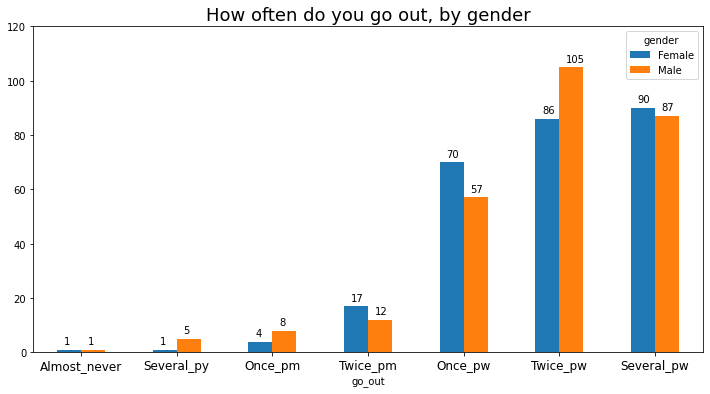

In [53]:
tmp = df[['gender', 'go_out']].groupby(['gender', 'go_out']).size().unstack(0)
tmp = tmp.reindex(['Almost_never', 'Several_py',
                   'Once_pm', 'Twice_pm',
                   'Once_pw', 'Twice_pw', 'Several_pw'])
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,120))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How often do you go out, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=10)

On the 2 extremes (Several times per week and almost never) the two genders look very similar with some difference in going out once or twice per week and once or twice per month. 


In [54]:
df[['race', 'go_out']].groupby(['race', 'go_out']).size().unstack().fillna(0)

go_out,Almost_never,Once_pm,Once_pw,Several_pw,Several_py,Twice_pm,Twice_pw
race,,,,,,,
Asian,2.0,5.0,42.0,36.0,2.0,11.0,38.0
Black,0.0,3.0,8.0,4.0,0.0,3.0,8.0
Hispanic,0.0,0.0,11.0,10.0,0.0,2.0,19.0
Other,0.0,0.0,8.0,13.0,2.0,1.0,13.0
White,0.0,4.0,58.0,114.0,2.0,12.0,113.0


Participants that declare to go out almost never (for how scarce) are both Asians, while Caucasian participants are equally likely to go out twice or several times per week.

At last, let's see how is the dating life of our participants.

In [55]:
df['date'] = df.date.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                         4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                         7: 'Almost_never'}).fillna(df.date)
df_full['date'] = df_full.date.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                         4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                         7: 'Almost_never'}).fillna(df_full.date)
df.date.value_counts(dropna=False)

Several_py      136
Twice_pm        131
Once_pm          99
Almost_never     94
Once_pw          54
Twice_pw         22
NaN               8
Several_pw        7
Name: date, dtype: int64

In [56]:
pd.crosstab(df.date, df.goal, normalize='index')

goal,Date,Fun,IdidIt,Meet,Other,Relationship
date,,,,,,
Almost_never,0.063830,0.361702,0.074468,0.414894,0.074468,0.010638
Once_pm,0.050505,0.444444,0.080808,0.292929,0.050505,0.080808
Once_pw,0.111111,0.574074,0.000000,0.240741,0.037037,0.037037
Several_pw,0.000000,0.714286,0.000000,0.000000,0.142857,0.142857
Several_py,0.051471,0.352941,0.058824,0.433824,0.051471,0.051471
Twice_pm,0.091603,0.435115,0.083969,0.328244,0.053435,0.007634
Twice_pw,0.181818,0.363636,0.045455,0.272727,0.045455,0.090909


* Not surprisingly, many of them date very seldom. In general, the distribution of their dating life is skewed in the opposite way with respect to the one of their social activity.
* The ones that are dating a lot are here for fun but 14% of them looks for a serious relationship

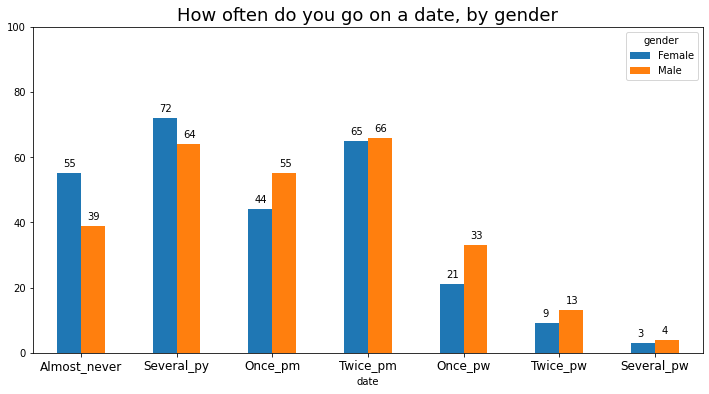

In [57]:
tmp = df[['gender', 'date']].groupby(['gender', 'date']).size().unstack(0)
tmp = tmp.reindex(['Almost_never', 'Several_py',
                   'Once_pm', 'Twice_pm',
                   'Once_pw', 'Twice_pw', 'Several_pw'])
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,100))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How often do you go on a date, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=10)

In [58]:
df[['race', 'date']].groupby(['race', 'date']).size().unstack().fillna(0)

date,Almost_never,Once_pm,Once_pw,Several_pw,Several_py,Twice_pm,Twice_pw
race,,,,,,,
Asian,35.0,21.0,9.0,2.0,36.0,27.0,6.0
Black,4.0,5.0,0.0,0.0,10.0,6.0,1.0
Hispanic,8.0,6.0,1.0,0.0,15.0,12.0,0.0
Other,3.0,6.0,8.0,0.0,9.0,9.0,2.0
White,44.0,61.0,36.0,5.0,66.0,77.0,13.0


In [59]:
df[['race', 'gender', 'date']].groupby(['race', 'gender', 'date']).size().unstack().fillna(0)

date             Almost_never  Once_pm  Once_pw  Several_pw  Several_py  \
race     gender                                                           
Asian    Female          17.0     10.0      3.0         2.0        20.0   
         Male            18.0     11.0      6.0         0.0        16.0   
Black    Female           3.0      3.0      0.0         0.0         7.0   
         Male             1.0      2.0      0.0         0.0         3.0   
Hispanic Female           4.0      3.0      1.0         0.0        10.0   
         Male             4.0      3.0      0.0         0.0         5.0   
Other    Female           2.0      1.0      4.0         0.0         5.0   
         Male             1.0      5.0      4.0         0.0         4.0   
White    Female          29.0     27.0     13.0         1.0        30.0   
         Male            15.0     34.0     23.0         4.0        36.0   

date             Twice_pm  Twice_pw  
race     gender                      
Asian    Female      16.0       3.0  
         Male        11.0       3.0  
Black    Female       3.0       0.0  
         Male         3.0       1.0  
Hispanic Female       7.0       0.0  
         Male         5.0       0.0  
Other    Female       4.0       0.0  
         Male         5.0       2.0  
White    Female      35.0       6.0  
         Male        42.0       7.0

In this case, Asian people declare to date less often, in general females date less than males but in the asian case the trend is reversed.

## Interests

Here, we look at what the participants declare to be their interest in various activities

In [60]:
def many_hist(cols):
    num = len(cols)
    rows = int(num/2) + (num % 2 > 0)
    fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
    i = 0
    j = 0
    for feat in cols:
        df[feat].hist(label=feat, ax=ax[i][j])
        ax[i][j].set_title(feat, fontsize=12)
        ax[i][j].grid(False)
        j = (j+1)%2
        i = i + 1 - j

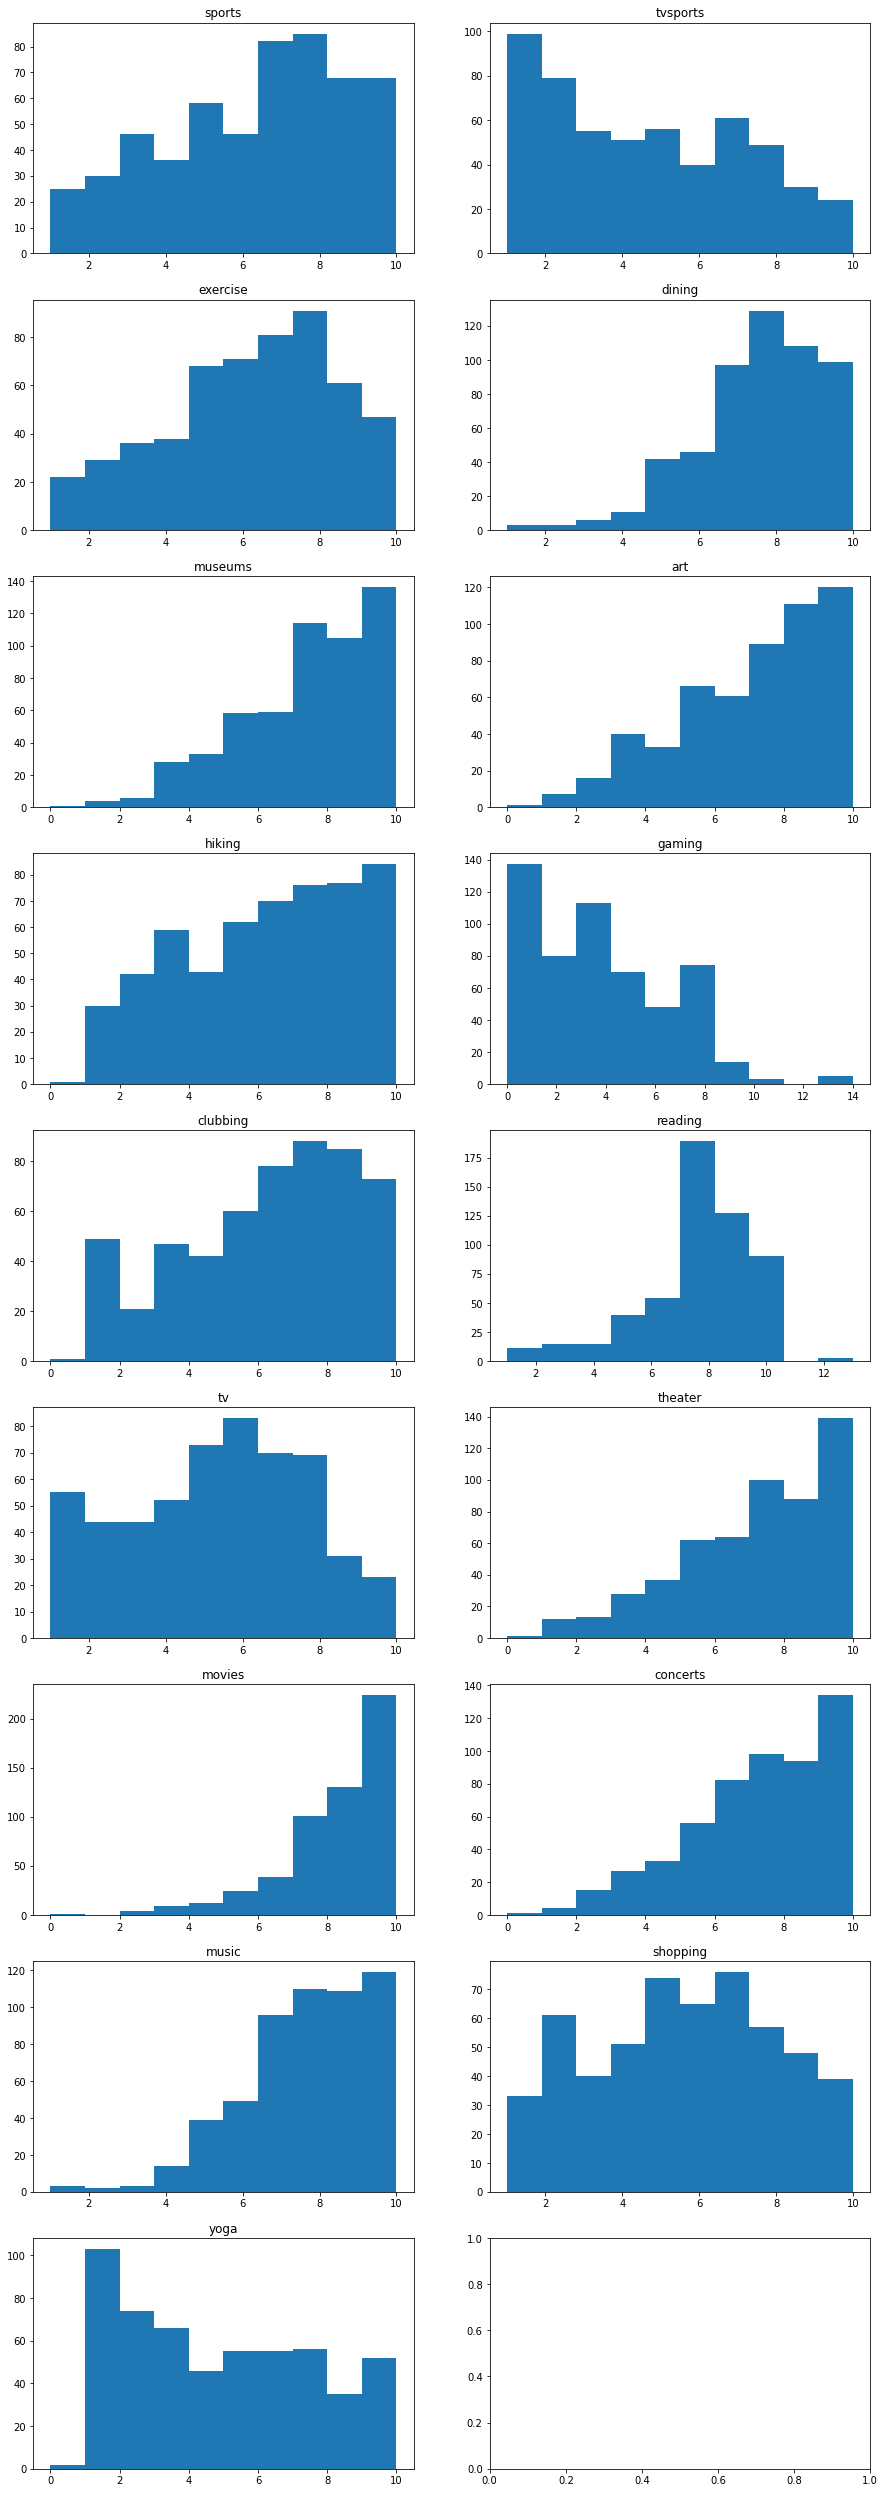

In [61]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']
many_hist(interests)

Text(0.5, 1.0, 'Correlation between interests')

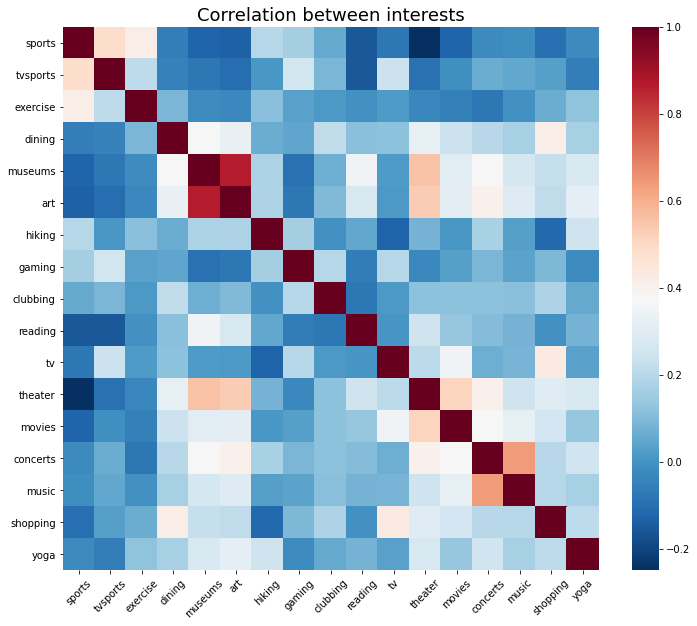

In [62]:
corr = df[interests].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

There is not much going on here, we notice that not surpringly liking art comes with liking museums, liking music with liking concerts, and liking sports with liking watching sports (but no correlation with liking ecercises for male participants, as we see in the next graph). Moreover, theater and sports do not seem to appeal the same people, especially for Female participants.

Text(0.5, 1.0, 'Females')

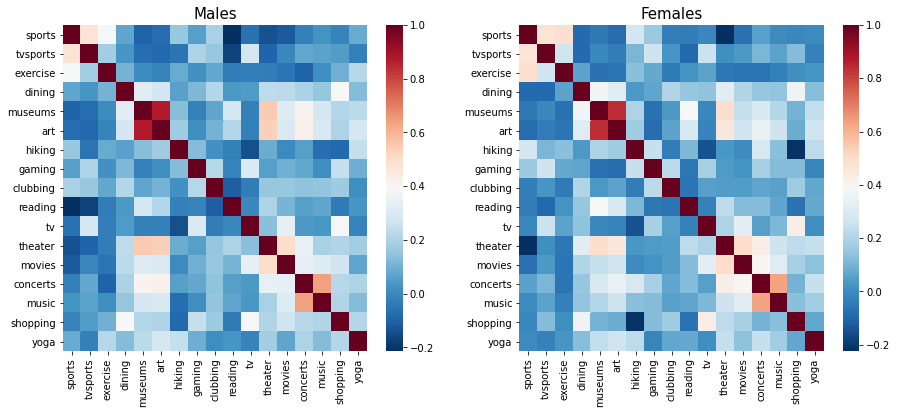

In [63]:
corr_m = df[df.gender=='Male'][interests].corr()
corr_f = df[df.gender=='Female'][interests].corr()

fig, ax= plt.subplots(1,2, figsize=(15, 6))
sns.heatmap(corr_m, cmap='RdBu_r', ax=ax[0])
sns.heatmap(corr_f, cmap='RdBu_r', ax=ax[1])

ax[0].set_title('Males', fontsize=15)
ax[1].set_title('Females', fontsize=15)

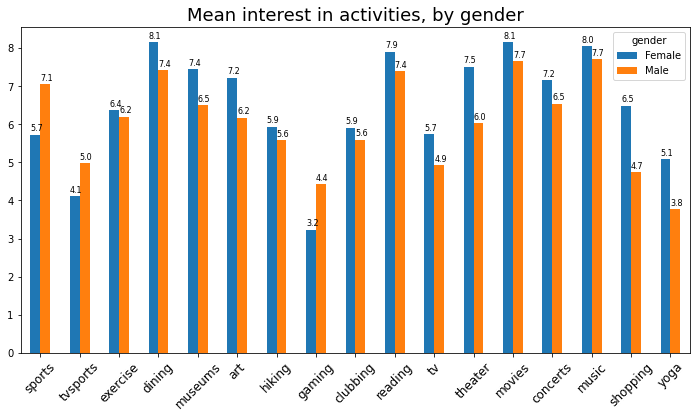

In [64]:
tmp = df[['gender']+ interests].groupby(['gender']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(12,6))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

Interestingly, with the exception of Sports, tv sports, and gaming, female participants have an higher average interest than their male counterparts in every activity.

Text(0.5, 1.0, 'Mean interest in activities, by race')

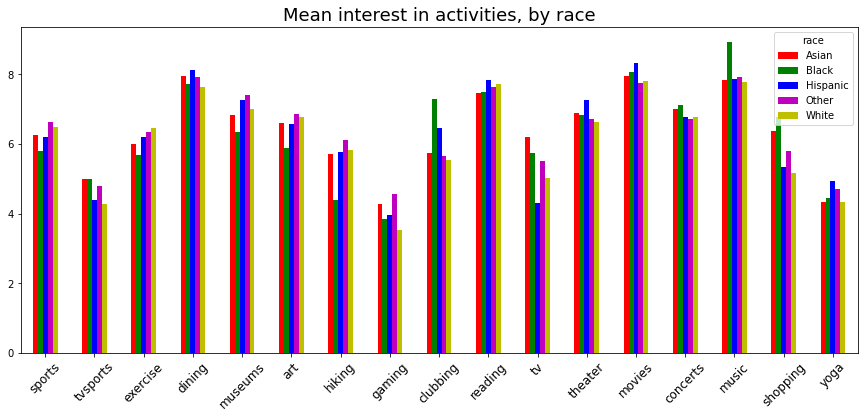

In [65]:
tmp = df[['race']+ interests].groupby(['race']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(15,6),color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by race', fontsize=18)

* People like more doing sports and exercising than watching it on tv, white people in particular
* Black people are not much into museums and art, but they do like music and clubbing
* Asians like tv a lot, while Hispanics not so much, preferring activities like reading, or going to theaters and movies

Every time I express myself in this way, I mean it as a description of this sample of participants, not of the population.

## Expectations

Another set of questions that can produce interesting answers are the one regarding the expectations of each participant

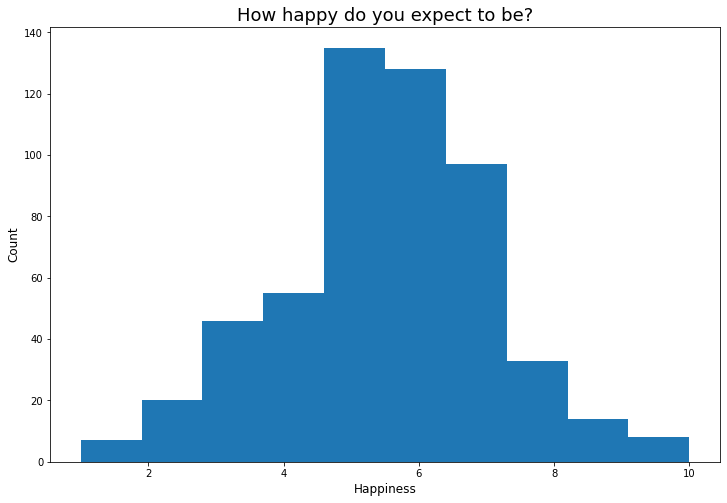

In [66]:
ax = df.exphappy.hist(bins=10, figsize=(12,8))
ax.set_title('How happy do you expect to be?', fontsize=18)
ax.set_xlabel('Happiness',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

As we did several times already, let's try to find some differences between genders and races.

In [67]:
df[['gender', 'exphappy']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

exphappy                        
            mean median  min   max count
gender                                  
Female  5.179104    5.0  1.0  10.0   268
Male    5.850909    6.0  1.0  10.0   275

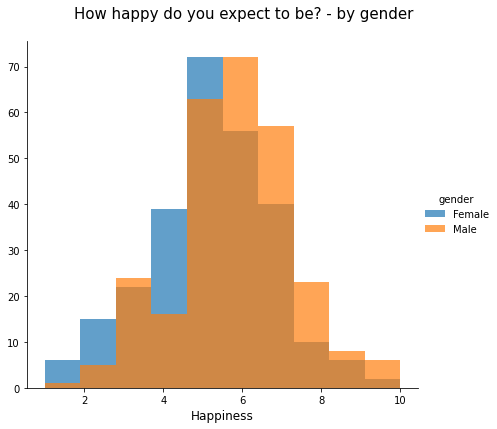

In [68]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'exphappy', alpha= 0.7, bins=10)
g.set_xlabels('Happiness', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How happy do you expect to be? - by gender', fontsize=15)
g.add_legend()

Males are more optimistic about the evening, while no significant differences can be observed if we split by race.

The next question is: *Out of the 20 people you will meet, how many do you expect will be interested in dating you? *

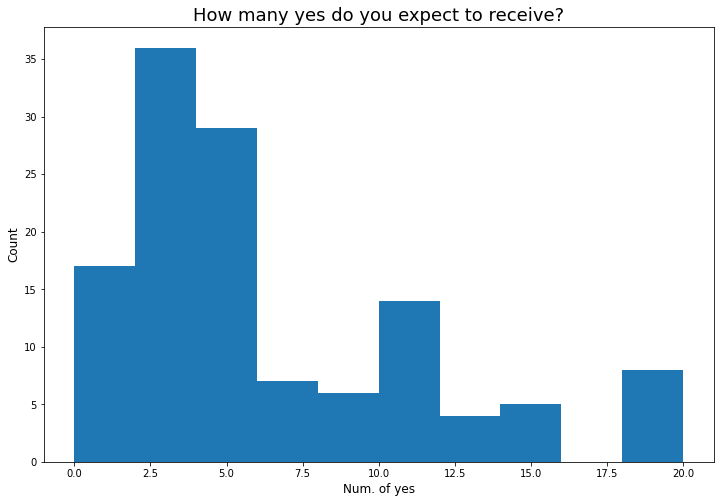

In [69]:
ax = df.expnum.hist(bins=10, figsize=(12,8))
ax.set_title('How many yes do you expect to receive?', fontsize=18)
ax.set_xlabel('Num. of yes',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

In [70]:
df[['gender', 'expnum']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

expnum                        
            mean median  min   max count
gender                                  
Female  5.870968    4.0  0.0  20.0    62
Male    5.906250    4.0  0.0  20.0    64

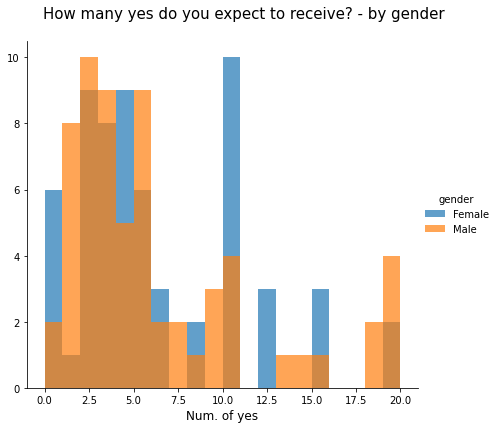

In [71]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'expnum', alpha= 0.7, bins=20)
g.set_xlabels('Num. of yes', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How many yes do you expect to receive? - by gender', fontsize=15)
g.add_legend()

There is no much difference in the averages, but it is easy to notice that a much larger proportion of males are very very confident while Females are more common in expecting a 50/50 success rate. 

I find curious also how a very low expectation (0 or 1) is expressed differently across genders, with Females preferring to set 0 and Males setting 1.

At last, in asking 500 people to rate an expecation from 1 to 20,  there are some values that are never picked, something that we might need to consider if we want to model on that.

C:\Users\R4YY\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


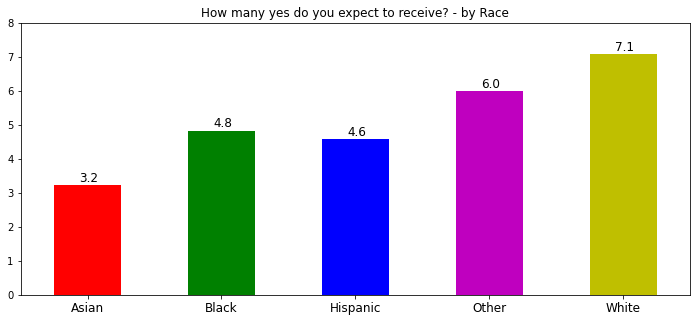

In [72]:
ax = df[['race', 'expnum']].groupby(['race']).mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='How many yes do you expect to receive? - by Race',
                                                   color='rgbmy', ylim=(0,8))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height()+.1, \
            str(round((i.get_height()), 1)), fontsize=12)

This is a much evident difference in expectations across races, something that we couldn't quite observe in the expectation of happiness.

All that being said, this question is not clear because each wave had a different number of partipants and it appears to be present only for the first 5 waves

In [73]:
df[['expnum', 'wave']].groupby('wave').sum()

,expnum
wave,
1,166.0
2,150.0
3,86.0
4,186.0
5,154.0
6,0.0
7,0.0
8,0.0
9,0.0


# Breaking the Waves

As the last example showed us, there can be some differences in the way the data were collected across the waves. Moreover, the documentation already tells us that the participants could express their preferences using different scales in different waves (1- 10 or assign 100 points across various categories), or that in wave 12 they could say yes to only half of the people they met, or that sometimes they had to bring a book or a magazine. All these factors can influence our analysis and our models. 

We will explore some of these effects in this section.

<ipython-input-74-1fb2c5cc88b2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)


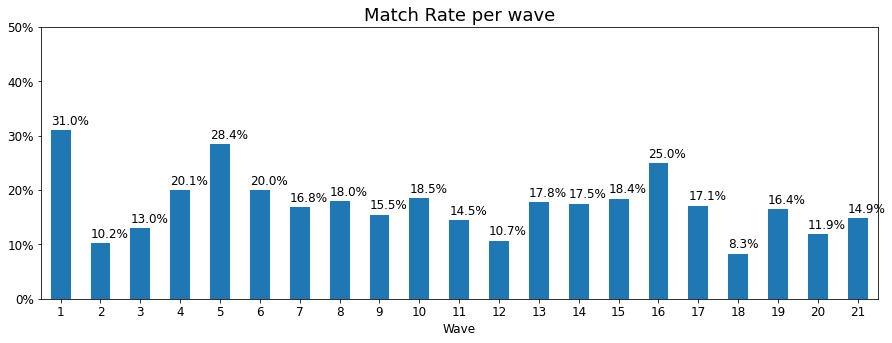

In [74]:
 ax = df_full[['wave', 'match']].groupby('wave').mean().plot(kind='bar', legend=False, figsize=(15,5),
                                                        ylim=(0,0.5))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Match Rate per wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

<ipython-input-75-5bba93cbc3f2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)


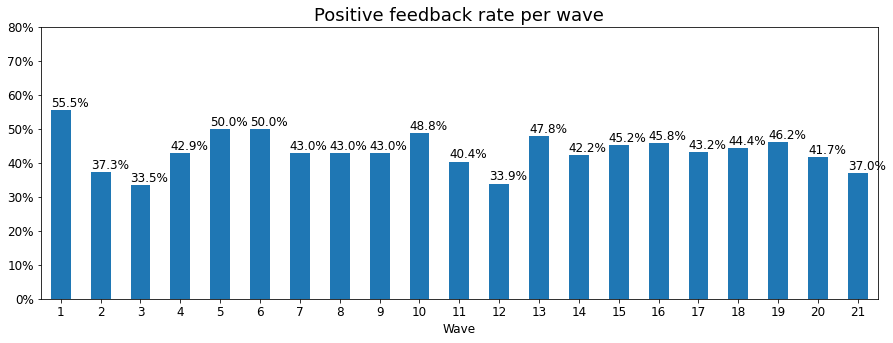

In [75]:
ax = df_full[['wave', 'dec']].groupby('wave').mean().plot(kind='bar', legend=False, figsize=(15,5),
                                                        ylim=(0,0.8))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Positive feedback rate per wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

We see that asking people to be more selective in wave 12 led to a lower match and positive feedback rate, but nothing that didn't happen in other waves as well. 

We can also see something happening in the waves were people were asked to bring a book or a magazine but drawing any conclusion about it would be premature and probably very wrong.

The one thing that I want to understand is if I can compare the preference scores of waves 6 to 9 (every category on a scale from 1 to 10) with the ones of the other waves (assign 100 points in total).

In [76]:
you_look = [col for col in df_full.columns if '1_1' in col] # what you look for in the opposite sex
other_look =  [col for col in df_full.columns if '4_1' in col] # you think other like you look for in the opposite sex
opp_look = [col for col in df_full.columns if '2_1' in col] # you think the opposite sex look for in you
you_score = [col for col in df_full.columns if '3_1' in col] # how do you score yourself
they_score = [col for col in df_full.columns if '5_1' in col] # the others score you
print(you_look)

['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']


In [77]:
tmp = df_full[['iid'] + you_look + other_look + opp_look + you_score + they_score].drop_duplicates()
df = pd.merge(df, tmp, on='iid')
df.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3,dec_diff,dec_same,dates_diff,dates_same,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,1,1,Female,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",Meet,Almost_never,Several_pw,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN,7.0,1.0,9.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,Female,24.0,law,Law,NaN,NaN,NaN,White,2.0,5.0,Alabama,"35,223","65,929.00",Fun,Once_pm,Several_pw,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,4.0,2.0,8.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,Female,25.0,Economics,Math,NaN,NaN,NaN,White,8.0,4.0,Connecticut,"6,268",NaN,Other,Once_pw,Several_pw,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,8.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
3,4,1,Female,23.0,Law,Law,NaN,NaN,NaN,White,1.0,1.0,Texas,"77,096","37,754.00",Fun,Once_pm,Several_pw,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,3.0,2.0,8.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
4,5,1,Female,21.0,Law,Law,NaN,NaN,NaN,White,8.0,1.0,Bowdoin College,"94,022","86,340.00",Meet,Twice_pm,Several_pw,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,6.0,2.0,8.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,6.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN


In [78]:
tmp_norm = df[(df.wave < 6) | (df.wave > 9)].copy()
tmp_diff = df[(df.wave > 5) & (df.wave < 10)].copy()
tmp_diff[['wave']+you_look+other_look].head(10)

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
130,6,16.67,16.67,16.67,16.67,16.67,16.67,10.0,7.0,7.0,7.0,5.0,7.0
131,6,12.77,19.15,17.02,17.02,14.89,19.15,7.0,7.0,7.0,7.0,6.0,7.0
132,6,6.67,20.00,20.00,17.78,20.00,15.56,6.0,9.0,9.0,7.0,7.0,6.0
133,6,18.18,22.73,18.18,13.64,13.64,13.64,8.0,8.0,8.0,9.0,9.0,7.0
134,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,6,17.39,17.39,15.22,17.39,13.04,19.57,9.0,6.0,5.0,8.0,5.0,8.0
136,6,20.00,20.00,20.00,20.00,6.67,13.33,9.0,9.0,7.0,8.0,3.0,7.0
137,6,18.75,16.67,18.75,20.83,12.50,12.50,10.0,9.0,8.0,9.0,3.0,8.0
138,6,18.60,16.28,18.60,18.60,11.63,16.28,7.0,9.0,8.0,7.0,7.0,9.0
139,6,20.83,20.83,16.67,16.67,6.25,18.75,10.0,9.0,4.0,7.0,8.0,8.0


In the above example, there is a respondent from wave 6 (thus that should score from 1 to 10 each category independently) that for some question had their scores converted to the other scale (assign 100 points to the categories) and some other questions were left intact. I am afraid I won't be able to use these questions or to use all the waves at the same time

The following charts are thus describing any wave but the ones between the 6th and the 9th.

In [79]:
tmp_norm[['wave']+you_look+other_look].sample(10)

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
434,17,28.00,8.00,17.00,22.00,17.00,8.00,20.0,20.0,20.0,20.0,20.0,0.0
439,17,35.00,10.00,25.00,20.00,5.00,5.00,50.0,0.0,20.0,20.0,0.0,10.0
373,14,30.00,20.00,15.00,15.00,8.00,12.00,23.0,15.0,15.0,15.0,27.0,5.0
354,14,15.00,25.00,20.00,20.00,0.00,20.00,30.0,10.0,15.0,15.0,30.0,0.0
67,3,21.00,17.00,22.00,20.00,8.00,13.00,NaN,NaN,NaN,NaN,NaN,NaN
81,4,20.00,20.00,20.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN
357,14,9.00,17.00,23.00,15.00,14.00,22.00,25.0,13.0,10.0,13.0,25.0,14.0
403,15,30.00,25.00,20.00,15.00,5.00,5.00,25.0,10.0,25.0,15.0,20.0,5.0
389,15,35.00,0.00,35.00,10.00,10.00,10.00,50.0,0.0,0.0,0.0,50.0,0.0
7,1,9.09,18.18,27.27,18.18,18.18,9.09,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'What do you look for in the opposite sex?')

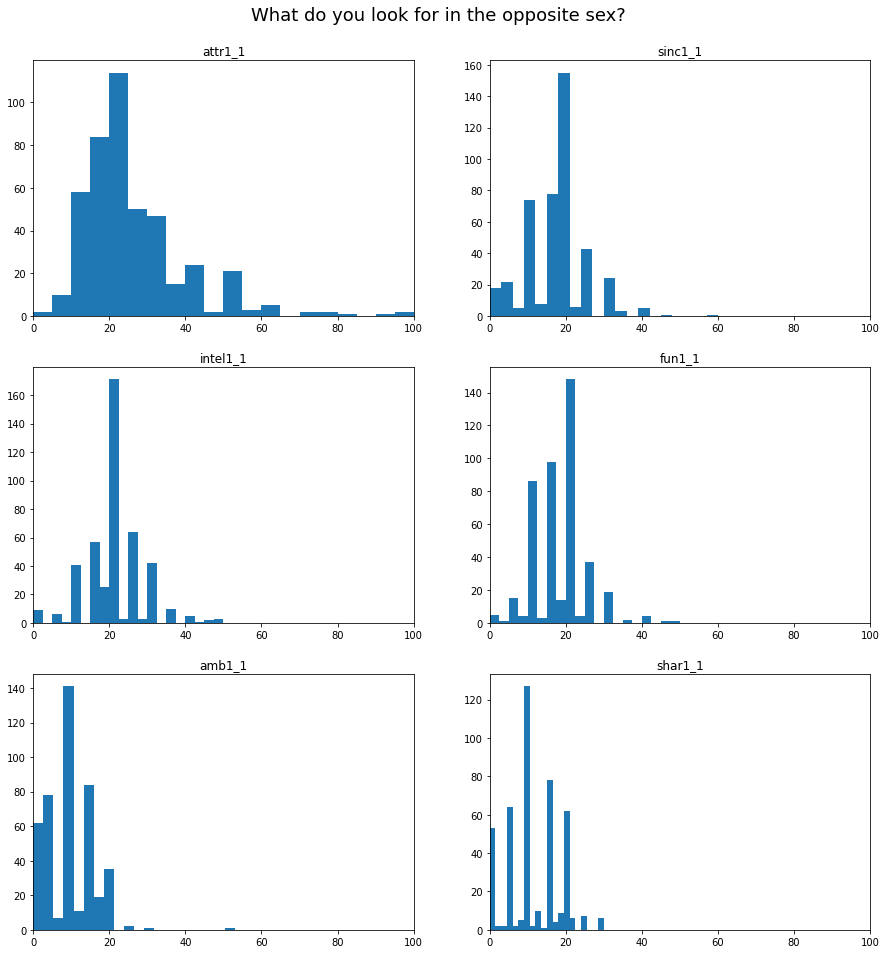

In [80]:
num = len(you_look)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in you_look:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=20)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].set_xlim(0,100)
    j = (j+1)%2
    i = i + 1 - j

plt.subplots_adjust(top=0.93)
fig.suptitle('What do you look for in the opposite sex?', fontsize=18)

Text(0.5, 0.98, 'What you think MOST of your fellow men/women look for in the opposite sex?')

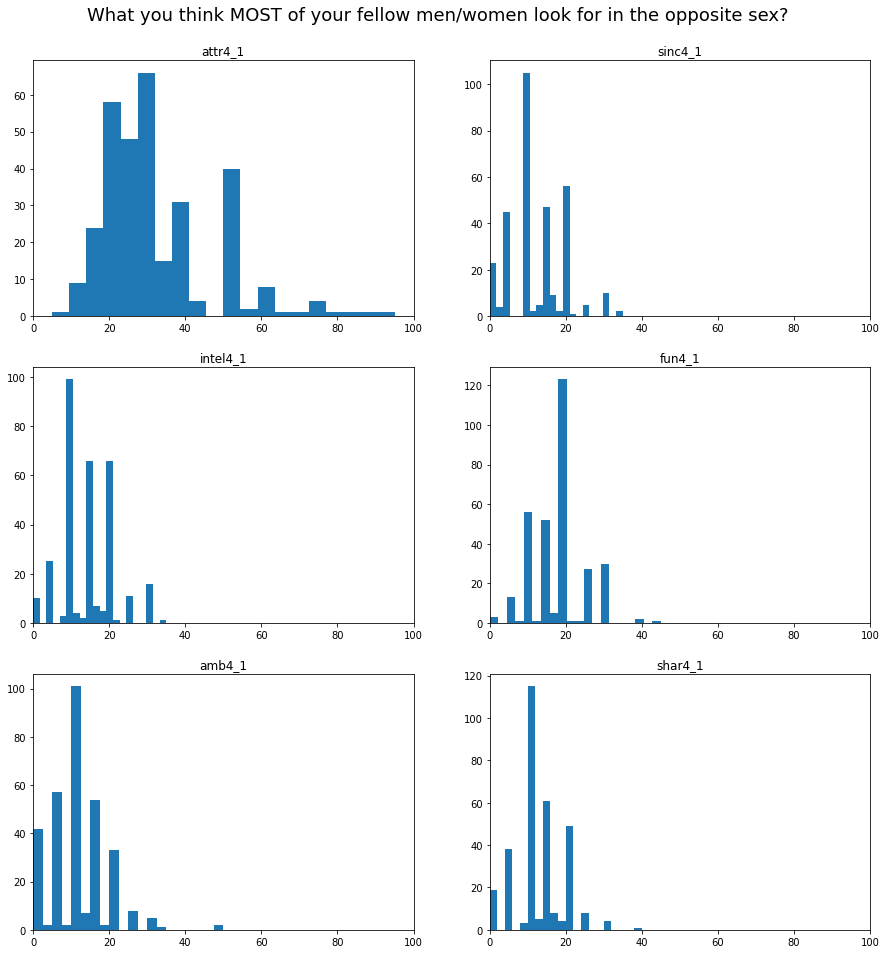

In [81]:
num = len(other_look)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in other_look:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=20)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].set_xlim(0,100)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('What you think MOST of your fellow men/women look for in the opposite sex?', fontsize=18)

Text(0.5, 0.98, 'What do you think the opposite sex looks for in a date?')

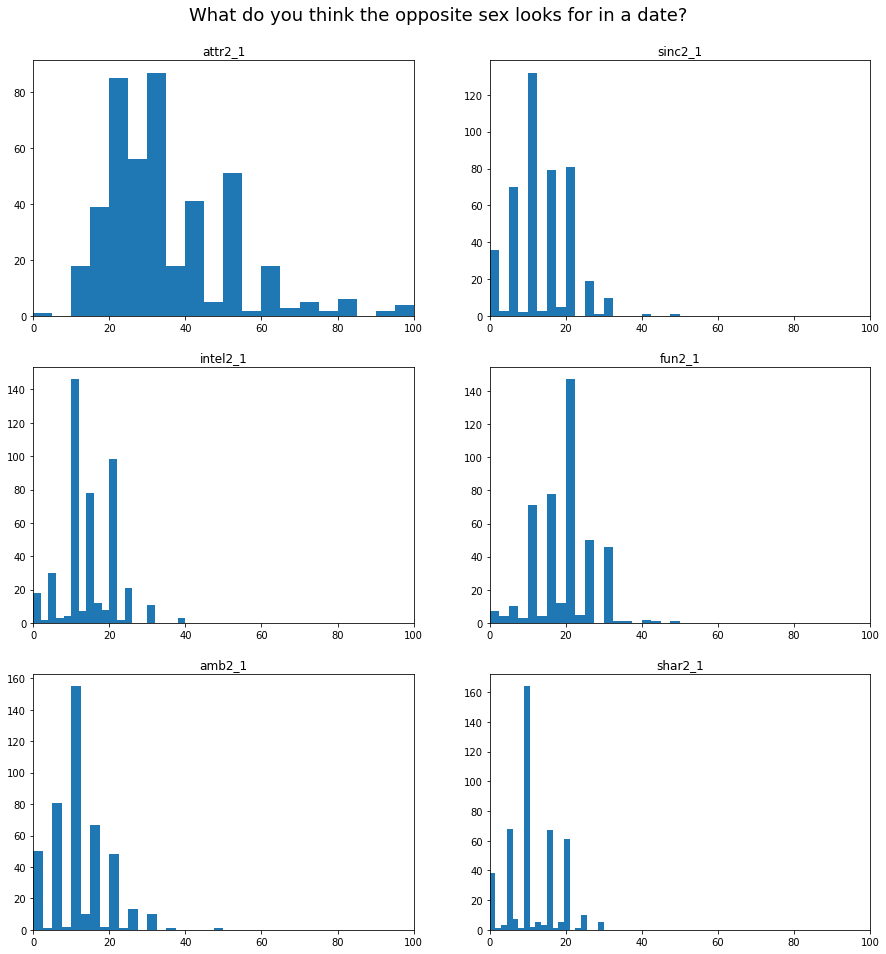

In [82]:
num = len(opp_look)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in opp_look:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=20)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].set_xlim(0,100)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('What do you think the opposite sex looks for in a date?', fontsize=18)

A few things pop out:

* People clearly rated attractiveness in the first place, then realized that they had to score up to a 100 and focused on very simple multiples of 5 and 10. This has to be taken into account if we want to model on that: these features are not continuous.
* The participants look for all the categories more or less equally in general, but having shared interests and being ambitious are generally less important.
* People generally think that attractiveness is as important as other things (with some exceptions) and also that everyone else (same gender and opposite gender) value this aspect much more.

Let's then see how they score themselves and how they think they are perceived

Text(0.5, 0.98, 'How do you think you measure up?')

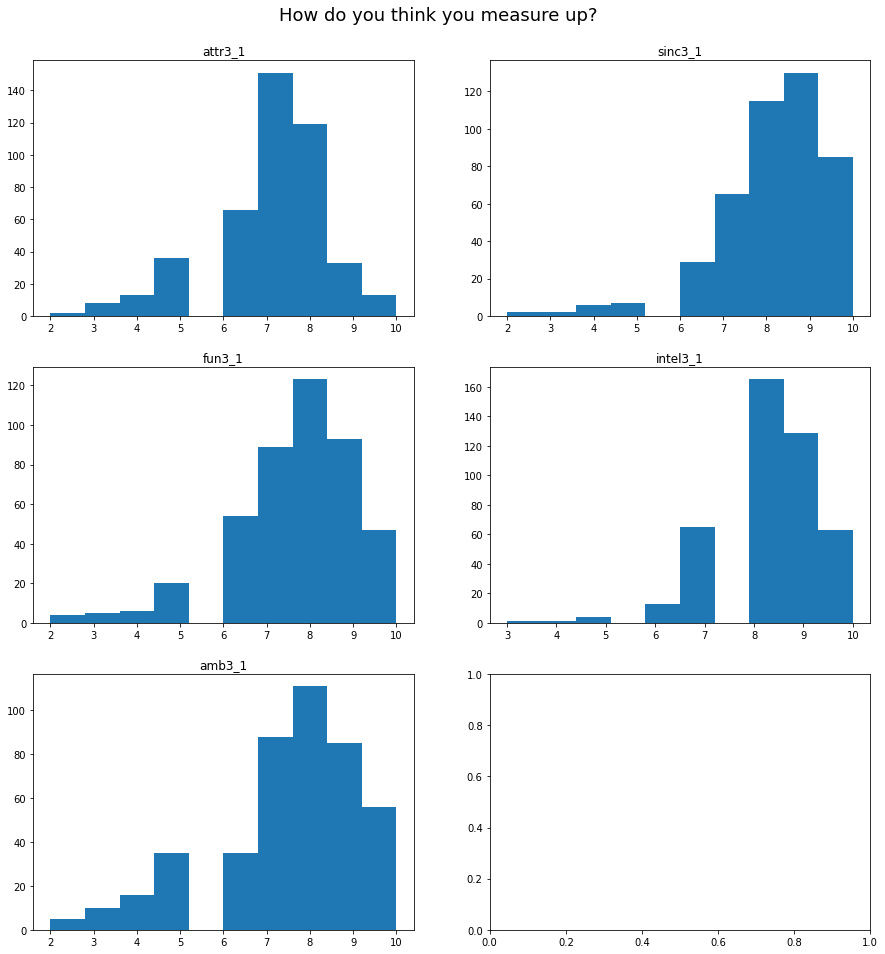

In [83]:
num = len(you_score)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in you_score:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=10)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you think you measure up?', fontsize=18)

Text(0.5, 0.98, 'How do you think others perceive you?')

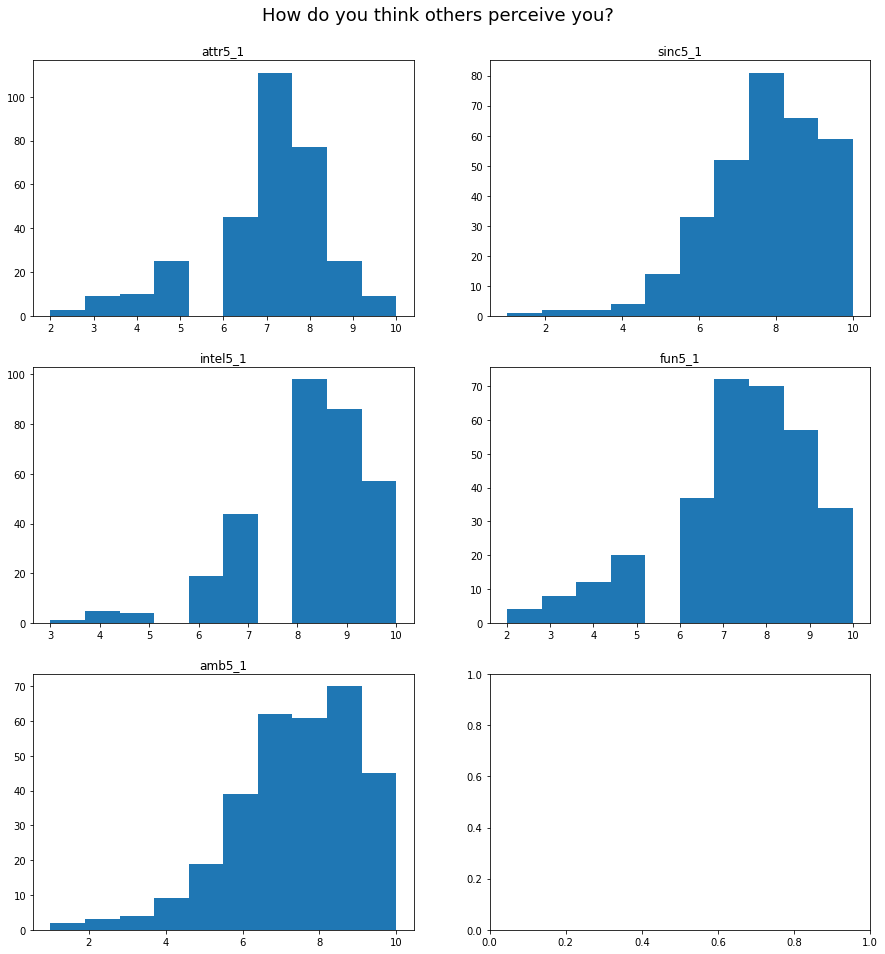

In [84]:
num = len(they_score)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in they_score:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=10)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you think others perceive you?', fontsize=18)

They are all **fairly confident**.

Text(0.5, 1.0, 'Correlation between evaluations')

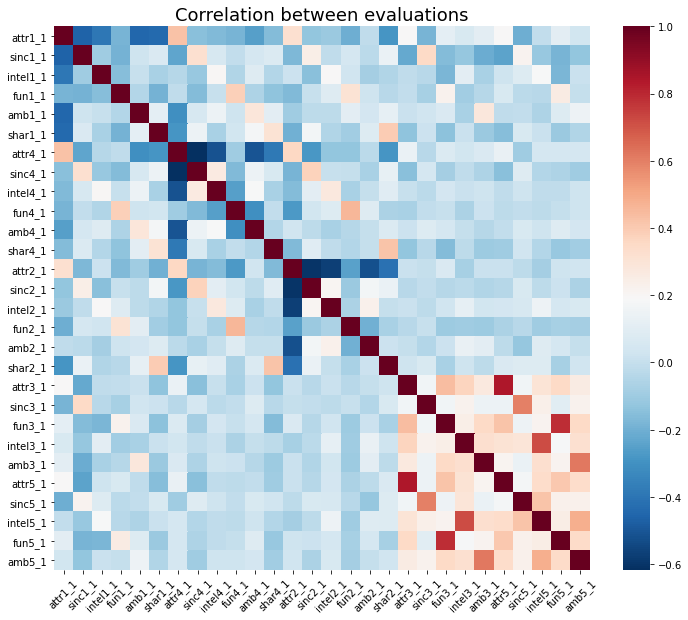

In [85]:
corr = tmp_norm[you_look + other_look + opp_look + you_score + they_score].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between evaluations', fontsize=18)

We indeed see that the scores they expect and how they measure themselves are very correlated, in particular on Attractive, Fun, and Intelligent. There is another correlation between the ways they think being fun or sharing interest is valued by their same gender and the opposite one. Opposite correlation between how they think other people value being attractive and the other categories, a correlation that becomes positive again if we look at how they think the two genders value this aspect.

The questions we explored in the previous section were then repeated half-way through the session, right after the session, and weeks after it. However, no significant change can be observed.

# Rating and deciding

Before getting into the modeling, we can explore one more thing: how do we rate a partner that we like and how do we rate one that we don't?

The participants were given a scorecard to fill at the end of each speed dating, communicating their decision, their rating about the other person, and their expectation. Let's see if we can spot some pattern in that.

For this analysis, we have to use the original DataFrame and we will pretend that we are a little different every time we meet someone new (we are not, maybe we can pretend a bit) so that we suddenly have more than 8 thousands individuals.

In [86]:
df = df_full[['iid', 'race', 'gender', 'field_cd', 'dec', 'match', 'int_corr', 'samerace', 'met',
             'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].copy()
df.head(5)

,iid,race,gender,field_cd,dec,match,int_corr,samerace,met,attr,sinc,intel,fun,amb,shar,like,prob
0,1,Asian,Female,Law,1,0,0.14,0,2.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,Asian,Female,Law,1,0,0.54,0,1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,Asian,Female,Law,1,1,0.16,1,1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,Asian,Female,Law,1,1,0.61,0,2.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,Asian,Female,Law,1,1,0.21,0,2.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0


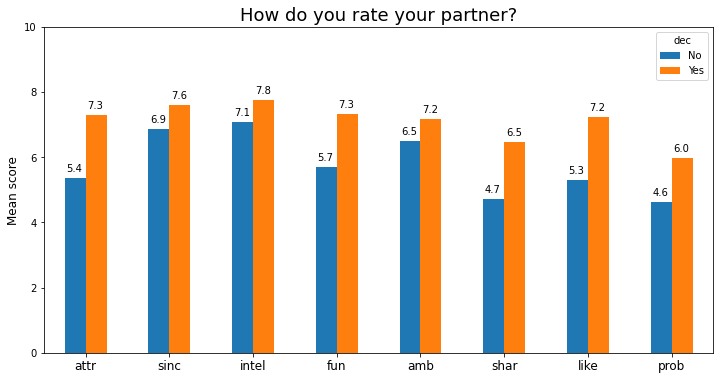

In [87]:
tmp = df[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].groupby('dec').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'No', 1: 'Yes'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,10))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How do you rate your partner?', fontsize=18)
ax.set_ylabel('Mean score', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

Text(0.5, 0.98, 'How do you rate your partner?')

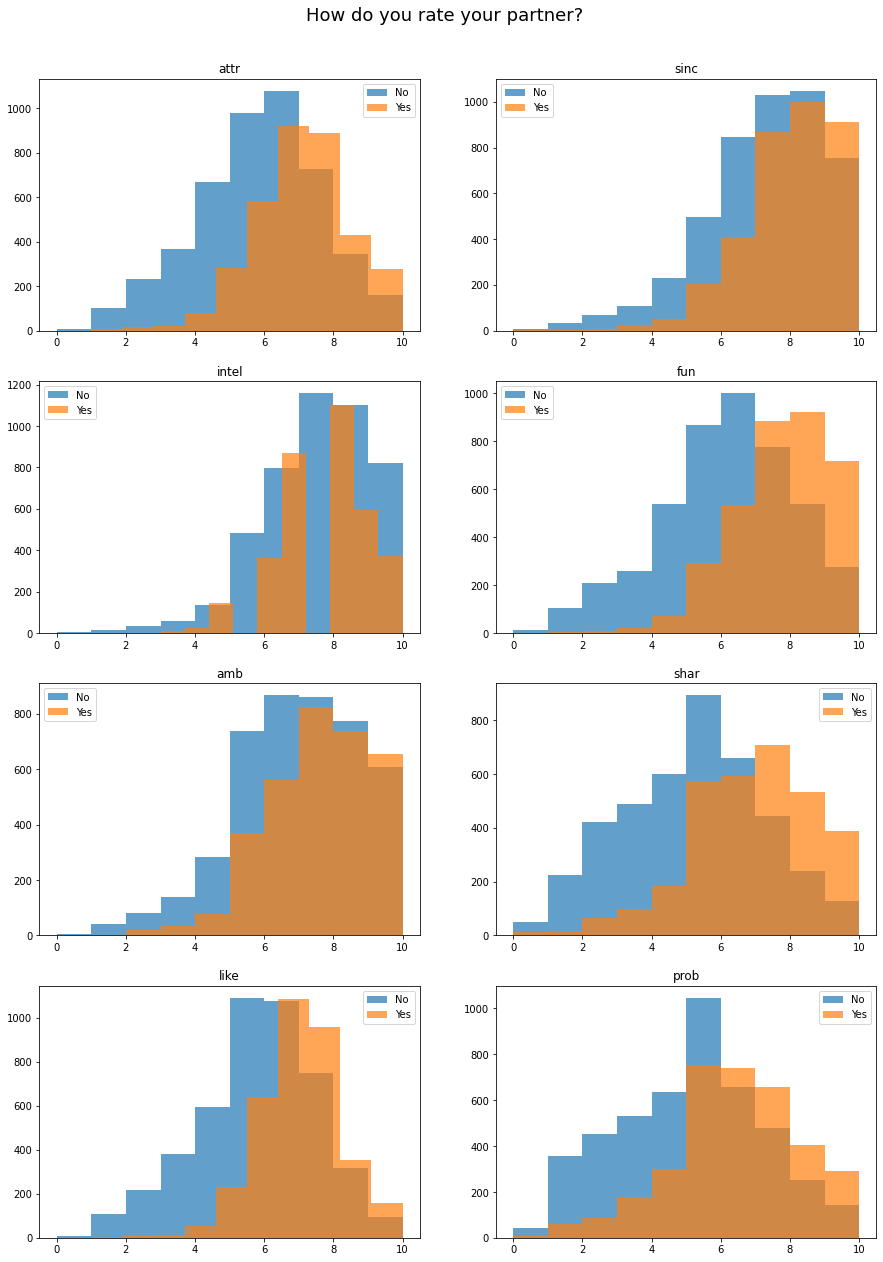

In [88]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats:
    df[df.dec==0][feat].hist(label='No', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.dec==1][feat].hist(label='Yes', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you rate your partner?', fontsize=18)

Text(0.5, 1.0, 'Yes')

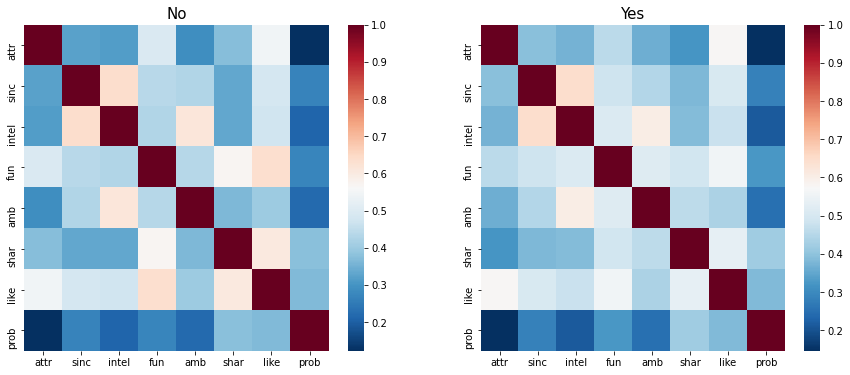

In [89]:
corr_m = df[df.dec==0][feats].corr()
corr_f = df[df.dec==1][feats].corr()

fig, ax= plt.subplots(1,2, figsize=(15, 6))
sns.heatmap(corr_m, cmap='RdBu_r', ax=ax[0])
sns.heatmap(corr_f, cmap='RdBu_r', ax=ax[1])

ax[0].set_title('No', fontsize=15)
ax[1].set_title('Yes', fontsize=15)

As expected, higher rates lead to positive decisions, with the higher gaps in Attractive, and 'How much do you like them' (coincidentally it is also the same gap). We also notice, however, that positive feedback can arrive even if the score in some categories is very low, with the exception of Intelligence, where there is a minimum of 3 to get positive feedback. 

It looks like being Fun is making quite the difference in the decision, while being Sincere looks not influential.

Looking at the correlations: 
* it seems that the negative correlation between Attractive and Sincere or Intelligent (which are always positively correlated) is getting milder when the decision is positive (although the causal link can easily go in the opposite direction). 
* interesting to see how rating a person as ambitious or attractive is reducing the expectations of the participants about being liked by them. Not so confident after all.
* when the decision is negative we can observe a positive correlation between the Like score and the Fun one that is not observed in cases of positive feedback (a fancy way of saying "I like you as a friend"?)

Interestingly, the relation between higher ratings and being of the same race is not observed, not necessarily in contrast with what was discussed before. In other words, although we observed that dates between people of the same race were having a higher rate of positive feedback and we observed that positive feedback comes with generally higher grades, we can't say that people are giving to partners of the same race higher grades. **Being of the same race is expected to be a big factor in predicting the individual decisions**.

Text(0.5, 0.98, 'How do you rate your partner?')

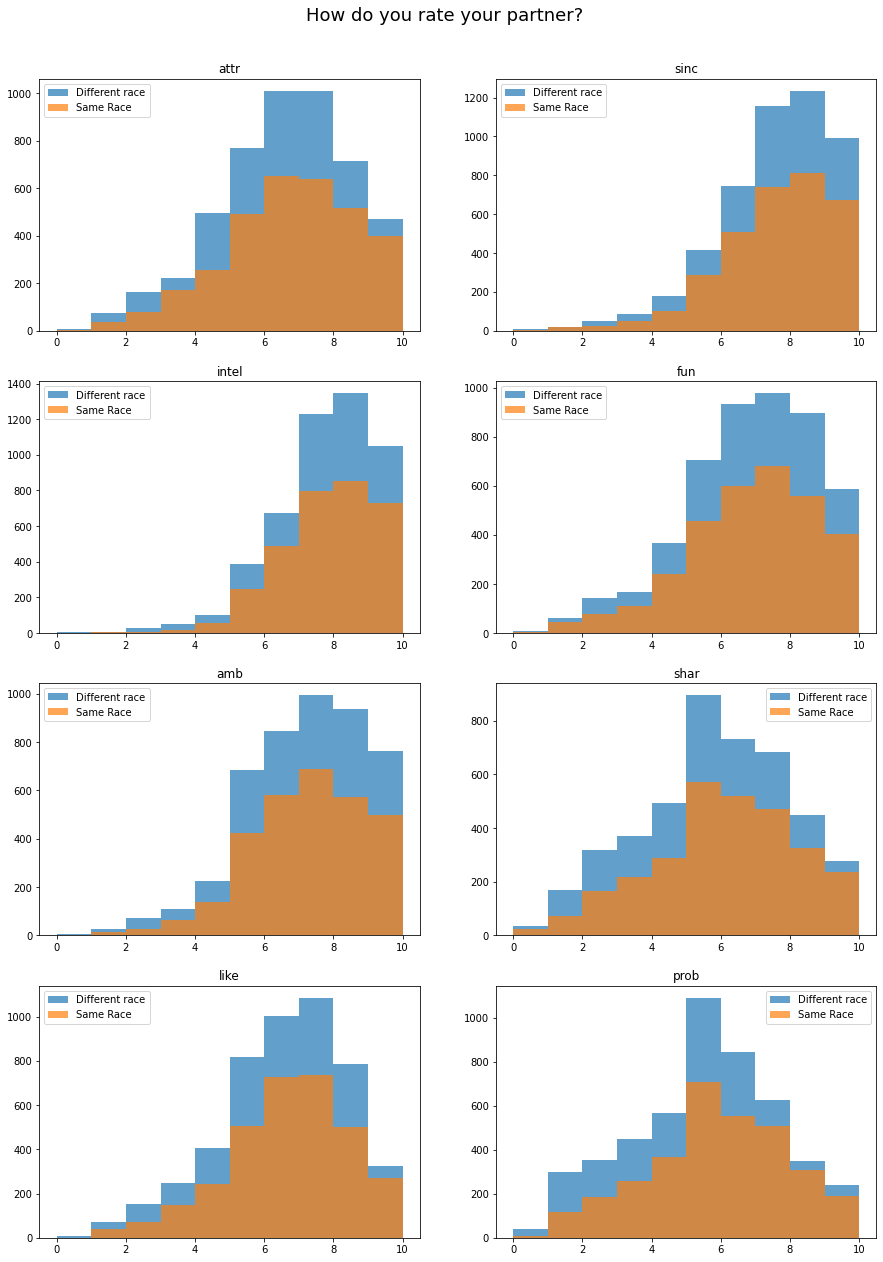

In [90]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats:
    df[df.samerace==0][feat].hist(label='Different race', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.samerace==1][feat].hist(label='Same Race', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you rate your partner?', fontsize=18)

# Machines can love too

We have seen times and times again that some patterns are hiding in these data and the machine learning enthusiast in all of us is now jumping around speaking about boosting, forests, and soul mates. After so much talking and staring at histograms we deserve some time staring at some machine learning the rules of love.

The goal of this section is to predict the decision of a participant after 4 minutes of date. We thus don't need everything that was answered *after* the decision since it is not in causal relation with our target.

We have already encountered a few mistakes in the data entries and a few missing values. We need to take care of that first.

## Machines don't like it dirty

This is the list of missing values. (hidden because too long, feel free to read it)

In [91]:
cols = df_full.columns
for col in cols:
    mis = df_full[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/df_full.shape[0] * 100, 3)))

id: 1 missing, 0.012%
positin1: 1846 missing, 22.034%
pid: 10 missing, 0.119%
int_corr: 158 missing, 1.886%
age_o: 104 missing, 1.241%
race_o: 73 missing, 0.871%
pf_o_att: 89 missing, 1.062%
pf_o_sin: 89 missing, 1.062%
pf_o_int: 89 missing, 1.062%
pf_o_fun: 98 missing, 1.17%
pf_o_amb: 107 missing, 1.277%
pf_o_sha: 129 missing, 1.54%
attr_o: 212 missing, 2.53%
sinc_o: 287 missing, 3.426%
intel_o: 306 missing, 3.652%
fun_o: 360 missing, 4.297%
amb_o: 722 missing, 8.618%
shar_o: 1076 missing, 12.843%
like_o: 250 missing, 2.984%
prob_o: 318 missing, 3.796%
met_o: 385 missing, 4.595%
age: 95 missing, 1.134%
field: 63 missing, 0.752%
field_cd: 82 missing, 0.979%
undergra: 3464 missing, 41.346%
mn_sat: 5245 missing, 62.604%
tuition: 4795 missing, 57.233%
race: 63 missing, 0.752%
imprace: 79 missing, 0.943%
imprelig: 79 missing, 0.943%
from: 79 missing, 0.943%
zipcode: 1064 missing, 12.7%
income: 4099 missing, 48.926%
goal: 79 missing, 0.943%
date: 97 missing, 1.158%
go_out: 79 missing, 0.943

Not as little as we might have hoped. Luckily, we don't need them all. We start dropping the ones referring to questions asked after the decision was taken.

In [92]:
to_drop = []
tmp = [col for col in df_full.columns if '1_s' in col or '3_s' in col] # asked mid session, not clear when so we drop it
to_drop += tmp
tmp = [col for col in df_full.columns if '_2' in col]  # asked after the session
tmp += ['length']
to_drop += tmp
tmp = [col for col in df_full.columns if '_3' in col]  # asked after the session
tmp += ['you_call', 'them_cal']
to_drop += tmp

print(f"Original shape: {df_full.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del df_full[col]
    
print(f"New shape: {df_full.shape}")

Original shape: (8378, 195)
Dropping 87 columns
New shape: (8378, 108)


Next, we drop columns that should not have any effect on the decision of an individual (like the unknown decision of their partner). We keep only how much the partner liked the participant since it can influence the decision (a *like to be liked* situation). We let the model decide if it is relevant or not.

In [93]:
to_drop = ['match']
print(f"Original shape: {df_full.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del df_full[col]
    
print(f"New shape: {df_full.shape}")

Original shape: (8378, 108)
Dropping 1 columns
New shape: (8378, 107)


We then drop everything that is missing quite consistently and does not refer to the partner.

In [94]:
to_drop = ['positin1', 'undergra', 'mn_sat', 'tuition', 'zipcode', 'income', 'expnum', 'match_es']
to_drop += [col for col in df_full.columns if '5_1' in col or '4_1' in col]  # sadly, not asked to everyone

print(f"Original shape: {df_full.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del df_full[col]
    
print(f"New shape: {df_full.shape}")

Original shape: (8378, 107)
Dropping 19 columns
New shape: (8378, 88)


Looking at the remaining missing values, it looks like we have mainly 3 situations:

* missing entries about a participant (like age, etc.) in some or every date
* missing entries about a partner in some or every date
* missing evaluation about a date

Since we know who the partners are, we can try to fill the missing entries about participants and partner by using the values we have for other dates (this assumes that those values are the same for every date, which is reasonable). 

We have a problem with a missing partner id in wave 5. A quick inspection reveals that we have 10 males meeting 10 females but only 9 females meeting 10 males. In other words, there is a missing female and we have no way to know who that person is. Since our prediction wants to be based on who your partner is and for these dates this information is missing, we drop these 9 dates

In [95]:
print('Unique id\'s in original dataframe: {}'.format(len(df_full.iid.unique())))
df_full = df_full[df_full.pid.notnull()].copy()  # dropping the missing female's dates.
print('Shape original dataframe: {}'.format(df_full.shape))
personal = ['gender', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 
       'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy']
personal += [col for col in df_full.columns if '1_1' in col]
print('_'*40)
print('_'*40)

participant = df_full[['iid', 'wave'] + personal].drop_duplicates().copy()
print('Unique id\'s in participants\' dataframe: {}'.format(len(participant.iid.unique())))
print('Shape participants\' dataframe: {}'.format(participant.shape))
print('_'*40)
print('Missing values about participants:')
cols = participant.columns
for col in cols:
    mis = participant[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/participant.shape[0] * 100, 3)))
print('_'*40)
print('_'*40)

personal_o = ['age_o','race_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']
partner = df_full[['pid', 'wave'] + personal_o].drop_duplicates().copy()
print('Unique id\'s in partners\' dataframe: {}'.format(len(partner.pid.unique())))
print('Shape partners\' dataframe: {}'.format(partner.shape))
print('_'*40)
print('Missing values about partners:')
cols = partner.columns
for col in cols:
    mis = partner[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/partner.shape[0] * 100, 3)))

Unique id's in original dataframe: 551
Shape original dataframe: (8368, 88)
________________________________________
________________________________________
Unique id's in participants' dataframe: 551
Shape participants' dataframe: (551, 38)
________________________________________
Missing values about participants:
age: 8 missing, 1.452%
field: 6 missing, 1.089%
field_cd: 7 missing, 1.27%
race: 6 missing, 1.089%
imprace: 7 missing, 1.27%
imprelig: 7 missing, 1.27%
goal: 7 missing, 1.27%
date: 8 missing, 1.452%
go_out: 7 missing, 1.27%
career: 8 missing, 1.452%
career_c: 12 missing, 2.178%
sports: 7 missing, 1.27%
tvsports: 7 missing, 1.27%
exercise: 7 missing, 1.27%
dining: 7 missing, 1.27%
museums: 7 missing, 1.27%
art: 7 missing, 1.27%
hiking: 7 missing, 1.27%
gaming: 7 missing, 1.27%
clubbing: 7 missing, 1.27%
reading: 7 missing, 1.27%
tv: 7 missing, 1.27%
theater: 7 missing, 1.27%
movies: 7 missing, 1.27%
concerts: 7 missing, 1.27%
music: 7 missing, 1.27%
shopping: 7 missing, 1.2

A quick inspection reveals that in both groups (participants and partners) the missing values are consistently missing for the same individuals over and over. This is a pity for our imputation but makes our job much easier: we drop these individuals.

In [96]:
col_to_filt = ['age', 'race']
mis_id = []

for col in col_to_filt:
    mis_id = list(set(mis_id + list(participant[participant[col].isna()].iid.values)))
    mis_id = list(set(mis_id + list(partner[partner[col + '_o'].isna()].pid.values)))

print(f'Original number of participants: {participant.shape[0]}')

mis_id += [28] # another respondent with a lot of missing values
participant = participant[~participant.iid.isin(mis_id)]
partner = partner[~partner.pid.isin(mis_id)]

print(f"Dropping {len(mis_id)} participants")
print(f"New number of participants: {participant.shape[0]}")

Original number of participants: 551
Dropping 9 participants
New number of participants: 542


In [97]:
print(f'Original shape of the dataframe: {df_full.shape}')
df_clean = df_full[~(df_full.iid.isin(mis_id) | df_full.pid.isin(mis_id))].copy()
del df_clean['id']  # not useful
del df_clean['field']  # redundant with field_cd
del df_clean['career']
del df_clean['career_c']  # both not explored and I am lazy
del df_clean['from']
del df_clean['partner']  # this is an id, never train on those

print(f'Shape of the cleaned data: {df_clean.shape}')

Original shape of the dataframe: (8368, 88)
Shape of the cleaned data: (8148, 82)


In [98]:
df_clean.loc[df_clean.field_cd.isna(), 'field_cd'] = 'Oth.'  # easy cleaning

A little bit of a butchery rather than a cleaning, but it involves only a few participants and any other approach would have been more invasive.

The remaining missing values regarding who the participants are (thus not their evaluation of the dates) will be kept as simple as possible. To avoid information leakage and keep our cross-validation trustable, we will impute the missing values inside of the pipeline.

Let's move on to the date-related missing values.

The first one is `met` which should take values 1 and 2 for No/Yes answers but it looks fairly inconsistent with the documentation or with the counterpart `met_o`. Using one feature to impute the other is pointless since they do not necessarily have to agree. We can simply impute the missing values with 0 and adjust the columns so that they respect the documentation.

Other small mistakes were found in other columns, we correct those too

In [99]:
df_clean.loc[df_clean.met.isna(), 'met'] = 0
df_clean.loc[df_clean.met_o.isna(), 'met_o'] = 0

df_clean.loc[df_clean.met < 2, 'met'] = 0
df_clean.loc[df_clean.met_o < 2, 'met_o'] = 0
df_clean.loc[df_clean.met > 1, 'met'] = 1
df_clean.loc[df_clean.met_o > 1, 'met_o'] = 1

df_clean.loc[df_clean.gaming > 10, 'gaming'] = 10
df_clean.loc[df_clean.reading > 10, 'reading'] = 10

At last, in `field_cd` some entries are very unfrequent, even less than the *Other* category. We can group them all under *Other*.

In [100]:
sprs = ['Und.', 'Arch.', 'Lang.']

df_clean.loc[df.field_cd.isin(sprs), 'field_cd'] = 'Oth.'

## No one forgets the first time

*That one time, in the forest, it was magical*

In previous versions of this kernel, I had some experiments going on, namely:

* A RandomForest on the data as they are, which didn't go that bad
* A lot of feature engineering in order to add information about the partner of each date
* Noticing that the forest was learning the data perfectly in every fold
* Failing in regularizing the Forest appropriately so that the variance of the model can be reduced
* Using XGBoost to have a model that not only performs better but also looks like it is not learning the training data perfectly
* Using a Forest to select the features and XGBoost to predict, all in the same pipeline to avoid information leak

All of this was done with the goal of getting a better score and I got to the conclusion that the main issue was that all the models needed more observations to learn, something not really doable. Moreover, I got up to a humble 85% of accuracy and I have to admit that, besides noticing from the learning curves that with way more data I can realistically get to around 90%, I have no way of knowing if it is a *good enough* result.

With these lessons in mind, I think it is more interesting to look at the problem from a different perspective. The question I want to answer to is then: **What can a machine learn if we vary the type of information available?**

Put differently, I want to see how the models change if we have

* Only information about the participant
* Only information about the partner
* Information about both

In all of these, we will try to see what signal the machine is picking up and spend some time interpreting it

## Participants and partners, engineering some features

In this section, we will prepare the data to make the experiments as clean as possible. The code will be hidden because nobody likes to see the code at a first read but what you will find in it is:

* libraries
* helper functions
* feature selection for the individual models

The feature engineering part won't be hidden because I want to explain the process as much as I can and **I need your feedback**

In [101]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from itertools import product 

In [102]:
# here some useful functions

def pretty_grid(model, param_grid, train, target, scoring, cv=5, n_jobs=1, verbose=False):
    grid = GridSearchCV(model, param_grid=param_grid, 
                        cv=cv, n_jobs=n_jobs, scoring=scoring,
                       return_train_score=True)
    grid.fit(train, target)
    best_model = grid.best_estimator_
    print(best_model)
    print("_"*40)
    print(pd.DataFrame(grid.cv_results_)[['params', 
                           'mean_test_score', 'std_test_score']].loc[grid.best_index_])
    if verbose:
        print("_"*40)
        print(pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score']])
    return best_model

def pretty_confusion(model, train, target, cv=5):
    prediction = cross_val_predict(model, train, target, cv=cv)
    print(classification_report(target, prediction))
    cm = confusion_matrix(target, prediction)

    cmap = plt.cm.Blues
    classes = [0,1]
    thresh = cm.max() / 2.
    fmt = 'd'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
def get_feature_importance(clsf, ftrs):
    imp = clsf.steps[-1][1].feature_importances_.tolist() #it's a pipeline
    feats = ftrs
    result = pd.DataFrame({'feat':feats,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

def learning_print(estimator, train, label, folds):
    """
    estimator: an estimator
    train: set with input data
    label: target variable
    folds: cross validation
    """
    train_sizes = np.arange(0.1, 1, 0.05)
    train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = estimator, X = train,
                                                   y = label, train_sizes = train_sizes, cv = folds,
                                                   scoring = 'accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    ax1.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    ax2.plot(train_sizes, train_scores_std, label = 'Training std')
    ax2.plot(train_sizes, validation_scores_std, label = 'Validation std')
    ax1.legend()
    ax2.legend()

In [103]:
# Things we are going to need all the time

kfolds = KFold(n_splits=5, shuffle=True, random_state=14)

imputer = ('imputer', SimpleImputer())

So far, we have not many features regarding the partners but mostly from characteristics of the participant. We thus need to do some manipulations in order to get the model learn from that too. The following cell takes care of adding some information about the partner for each date by simply looking it up (every `iid` / `pid` couple is present twice in the DataFrame)

In [104]:
prtn_cols = ['field_cd', 'imprace', 'imprelig', 'goal',
       'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']

tmp = df_clean[['iid', 'pid']+ prtn_cols].copy()
tmp = tmp.rename(columns={'iid' : 'pid', 'pid': 'iid'}) # reversing iid and pid in the temporary frame

renaming = {col : col+'_o' for col in prtn_cols} 
tmp = tmp.rename(columns=renaming)

df_clean = pd.merge(df_clean, tmp, on=['iid', 'pid'])

del tmp

# checking it went well
df_clean[((df_clean.iid == 1) & (df_clean.pid == 11)) | 
         ((df_clean.iid == 11) & (df_clean.pid == 1))][['iid', 'pid', 'gender', 'museums', 'field_cd', 'museums_o', 'field_cd_o']]

,iid,pid,gender,museums,field_cd,museums_o,field_cd_o
0,1,11.0,Female,1.0,Law,7.0,Econ
100,11,1.0,Male,7.0,Econ,1.0,Law


As we see on a (not so random, being the first of the list) date, we have the correct informations about the partner too.

The next issue is actually a cleaning issue: the evaluations on how much the participants value some characteristics are not uniformily gathered across the waves. We can either drop those features or drop those waves. Since, looking at the learning curves, it seems that the learning would not benefit from a decrease of data points, we could remove the problematic features. Unfortunately, the model drops in performance a lot if we do so. 

Another solution is to flag each wave with its peculiarity

In [105]:
# waves where the points were given differently
df_clean['vote_differently'] = 0
df_clean.loc[(df_clean.wave > 5) & (df_clean.wave < 10), 'vote_differently'] = 1

# wave where they could chose only 50%
df_clean['on_a_budget'] = 0
df_clean.loc[df_clean.wave == 12, 'on_a_budget'] = 1

# waves where they were asked to come with a magazine
df_clean['with_magazine'] = 0
df_clean.loc[(df_clean.wave == 18) | (df_clean.wave == 21), 'with_magazine'] = 1

# waves where they were asked to come with a book
df_clean['with_book'] = 0
df_clean.loc[(df_clean.wave == 19) | (df_clean.wave == 20), 'with_book'] = 1

Now, since we have all the information we want we can ask ourselves *how relevant can be, in general, liking sports to decide whether or not we want to date someone?* 

The models will try answer this question. However, I can't help but thinking that it does not matter how much you like something but rather **how much you and your partner share that opinion**. In other words, it might not be relevan *in general*, but it can be relevant in a specific case. For this reason, the next set of features is taking care of describing this situation.

In [106]:
for col in interests:
    # difference in opinion about an interest
    df_clean[col+'_sh'] = (df_clean[col] - df_clean[col+'_o'])

On the same lines, we can create things like age difference, same field of study, same goals, etc.

In [107]:
# relative age difference
df_clean['age_diff'] = (df_clean['age'] - df_clean['age_o'])
df_clean.loc[(df_clean.age_diff > 0) & (df_clean.gender == 'Male'), 'age_diff_cat'] = 'older_male'
df_clean.loc[(df_clean.age_diff > 0) & (df_clean.gender == 'Female'), 'age_diff_cat'] = 'older_female'
df_clean.loc[(df_clean.age_diff < 0) & (df_clean.gender == 'Male'), 'age_diff_cat'] = 'younger_male'
df_clean.loc[(df_clean.age_diff < 0) & (df_clean.gender == 'Female'), 'age_diff_cat'] = 'younger_female'
df_clean.loc[(df_clean.age_diff == 0), 'age_diff_cat'] = 'same_age'

# who remembers if they met
df_clean['met_comp'] = df_clean['met'] - df_clean['met_o']
df_clean.loc[df_clean.met_comp == 0, 'met_comp'] = 'same'
df_clean.loc[df_clean.met_comp == 1, 'met_comp'] = 'partec'
df_clean.loc[df_clean.met_comp == -1, 'met_comp'] = 'partner'

# same field flag
df_clean['same_field'] = 0
df_clean.loc[df_clean.field_cd == df_clean.field_cd_o, 'same_field'] = 1

# same goal flag
df_clean['same_goal'] = 0
df_clean.loc[df_clean.goal == df_clean.goal_o, 'same_goal'] = 1

Another factor that I can imagine could play a role is *how good of a night it is*. In other words, from previous versions we know that the *like* factor is very important and I wonder if having meet someone that I liked a lot can change my perspective on the successive dates. We then start aknowledging that the dates are happening in order and try to create the appropriate feature.

In [108]:
test = df_clean[['iid', 'order', 'like']].copy().sort_values(by=['order']).fillna(6) 
# fill the missing with neutral vote

# How good is the night in general?
test['like_cumulative'] = test.groupby(['iid'])['like'].cumsum()
test['mean_liking'] = test.like_cumulative / test.order

# How good it the person with respect to the mean
test['like_spread'] = test.like.fillna(6) - test.mean_liking

# Did they encounter someone they liked a lot already?
test['high_like'] = 0
test.loc[test.like > 8, 'high_like'] = 1
test['high_like'] = test.groupby('iid')['high_like'].cumsum()
test.loc[test.high_like > 1, 'high_like'] = 1

# removing columns
del test['like_cumulative']
del test['like']

# putting together
df_clean = pd.merge(df_clean, test, on=['iid', 'order'])

del test

***Note***: The right way to create `spread_like` would be to create the feature inside of the pipeline, after the imputer. Sadly, I am repeatedly failing in creating such class. Please help me :)

From previous runs, I noticed that adding the `spread_like` feature mentioned above would improve the score but also increase the number of false positives by a lot. It essentially predicts `1` more often, resulting in fewer false negatives and more false positives and, since we have more false negatives, this increases the accuracy. 

The reason why this happens, I think, is because that feature is using a highly important feature (`like`), arbitrarily set to `6` its missing values, and then computing the distance to `mean_liking`. The imputation, while less harmful when we calculate `mean_liking`, is a strong assumption and *distracts the model*. 

The next hidden cell will prepare the data for each of the 3 cases mentioned above

In [109]:
general_info = ['gender', 'condtn', 'order', 'with_book', 'with_magazine', 'on_a_budget', 'vote_differently']
participant_info = ['age', 'met', 'field_cd', 'race', 'imprace', 
                    'imprelig', 'goal', 'date', 'go_out', 'exphappy'] + you_look + you_score + opp_look
partner_info = [col for col in df_clean.columns if 'pf_o_' in col] + \
                ['age_o', 'met_o', 'field_cd_o', 'race_o', 'imprace_o', 'imprelig_o',
                'goal_o', 'date_o', 'go_out_o']
interests_o = [col+'_o' for col in interests]
votes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob'] 
votes_o = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o']
special_votes = ['mean_liking', 'like_spread', 'high_like']
shared = [col+'_sh' for col in interests] + ['int_corr', 'samerace', 'age_diff', 
                                             'age_diff_cat', 'met_comp', 'same_field', 'same_goal']
target = df_clean['dec_o']


# Creating frames
df_participants = df_clean[general_info+participant_info+interests+votes+special_votes].copy() 
df_partner = df_clean[general_info+partner_info+interests_o+votes_o].copy()
df_both = df_clean[general_info+participant_info+partner_info+
                   interests+votes+special_votes+interests_o+votes_o+shared].copy()

## All by myself - no partner information

This is a situation where we are essentially predicting what a person will decide for who they are and the votes they received from a partner that we completely ignore. The case I imagine being useful for such model is a sort of propensity to saying yes to someone after 4 minutes of conversation.

In [110]:
df_train = pd.get_dummies(df_participants, 
                          columns=['gender'], 
                          drop_first=True)

# things to drop because it improves the model
del df_train['race']
del df_train['like_spread']
del df_train['goal']
del df_train['field_cd']
del df_train['with_book']
del df_train['date'] 
del df_train['condtn']
del df_train['with_magazine']
del df_train['on_a_budget']
del df_train['vote_differently']
del df_train['mean_liking']
del df_train['high_like']



freq_map = {'Almost_never' : 0,
           'Several_py': 1, 
           'Once_pm': 2,
           'Twice_pm': 3,
           'Once_pw': 4,
           'Twice_pw': 5,
           'Several_pw': 6}

df_train.go_out = df_train.go_out.map(freq_map)

partic_cols = df_train.columns  # will be needed in the last section


df_train.head()



,order,age,met,imprace,imprelig,go_out,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr,sinc,intel,fun,amb,shar,like,prob,gender_Male
0,4,21.0,1.0,2.0,4.0,6,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,0
1,3,21.0,0.0,2.0,4.0,6,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,0
2,10,21.0,0.0,2.0,4.0,6,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,0
3,5,21.0,1.0,2.0,4.0,6,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,0
4,7,21.0,1.0,2.0,4.0,6,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,0


In [111]:
pipe = Pipeline([imputer, 
                 ('xgb', XGBClassifier(n_jobs=1, random_state=42, 
                                       subsample=0.8))])

param_grid = [{'xgb__n_estimators' : [900, 1000, 1100],
               'xgb__learning_rate': [0.1, 0.05, 0.01]}]

best_participant = pretty_grid(pipe, param_grid, df_train, target,
                         'accuracy', cv=kfolds, n_jobs=-1) 

C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('imputer', SimpleImputer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=900,
                               n_jobs=1, num_parallel_tree=1, random_state=4

In [112]:
best_participant.steps[1][1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

[19:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      4720
           1       0.62      0.53      0.57      3428

    accuracy                           0.66      8148
   macro avg       0.65      0.65      0.65      8148
weighted avg       0.66      0.66      0.66      8148



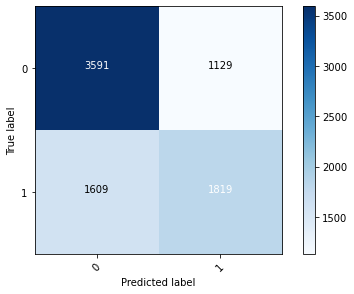

In [113]:
pretty_confusion(best_participant, df_train, target, kfolds)

[19:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


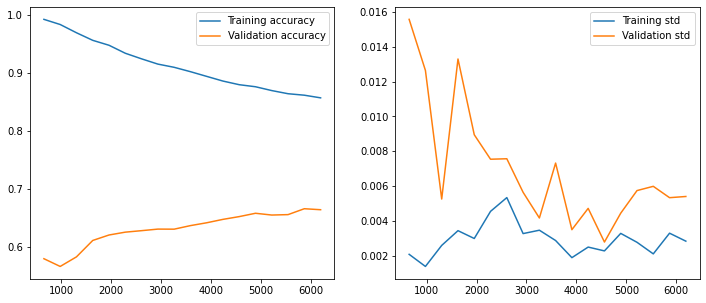

In [114]:
learning_print(best_participant, df_train, target, kfolds)  

In [115]:
get_feature_importance(best_participant, df_train.columns).head(10)

,feat,score
49,gender_Male,0.066821
48,prob,0.028186
12,shar1_1,0.026944
5,go_out,0.024513
24,sports,0.024266
26,exercise,0.023014
8,sinc1_1,0.022883
19,sinc2_1,0.022451
18,attr2_1,0.021984
10,fun1_1,0.021490


In [116]:
get_feature_importance(best_participant, df_train.columns).tail(10)

,feat,score
3,imprace,0.016450
42,sinc,0.016041
14,sinc3_1,0.015954
43,intel,0.014323
44,fun,0.013407
2,met,0.013228
46,shar,0.012924
45,amb,0.012480
47,like,0.012119
0,order,0.011979


It looks like the model is able to predict well whether or not a person will say *yes* at the end of a speed date if it knows everything about that person (including and especially how much is enjoying the date). Nothing shocking then. If we ignore the votes, a strong indicator of how much the participant is enjoying the date and a very strong predictor of the outcome, the accuracy **drops to 70%**, a result that, as we will see is perfectly in line with the next type of model.

Interesting to see little importance given to the gender, indicating the model learns fairly equally the decisions of Males and Females, and that having met someone that we liked a lot or having met the partner before are equally unimportant. On the other hand, how well the night is going is the stronger predictor together with how good the date is. An intriguing result is the importance of `order`, which we could probably drop for better explainability of the model.

Moreover, the model learns better if it doesn't consider the field of study, the dating habits, and, more surprisingly, how much the participant likes the person with respect to the previous dates and their race.

Let's see what the model got right and what got wrong.

In [117]:
predictions_participants_only = cross_val_predict(best_participant, df_train, target, cv=kfolds)

C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
participants_analysis = pd.concat([df_participants, 
                                   pd.DataFrame({'target':target, 
                                                 'prediction':predictions_participants_only})], axis=1)

FP = participants_analysis[(participants_analysis.target == 0) & (participants_analysis.prediction == 1)].copy()
FN = participants_analysis[(participants_analysis.target == 1) & (participants_analysis.prediction == 0)].copy()
good_pred = participants_analysis[participants_analysis.target == participants_analysis.prediction].copy()

In [119]:
print("Target mean for full dataset: {}".format(round(participants_analysis.target.mean(),3)))
print("Prediction mean for full dataset: {}".format(round(participants_analysis.prediction.mean(),3)))
print("Target mean for correct predictions: {}".format(round(good_pred.target.mean(),3)))

Target mean for full dataset: 0.421
Prediction mean for full dataset: 0.362
Target mean for correct predictions: 0.336


In [120]:
to_check = ['fun', 'concerts', 'movies', 'theater', 'clubbing', 'art', 'museums']

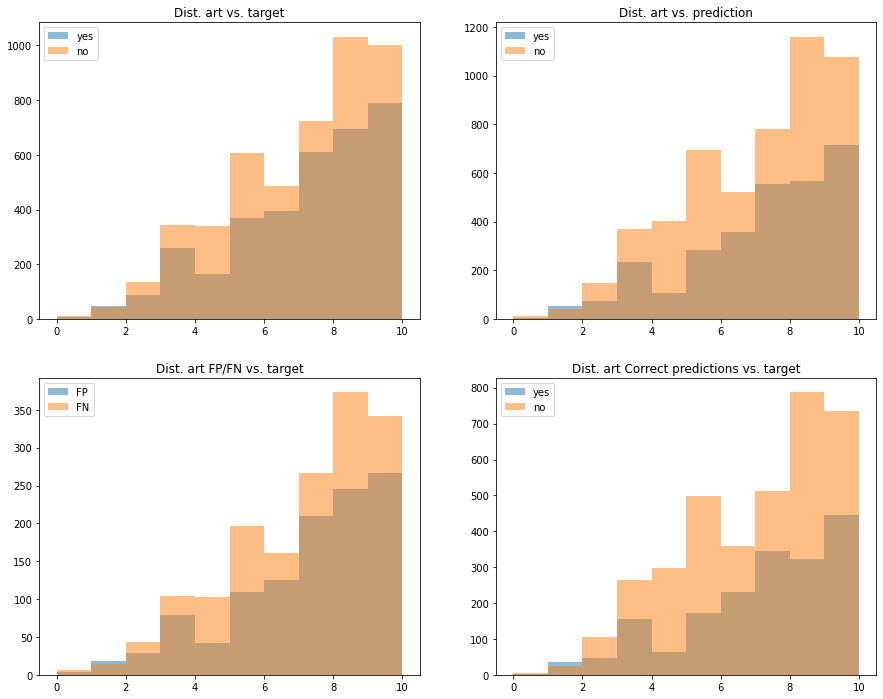

In [121]:
col = to_check[5]

fig, ax= plt.subplots(2,2, figsize=(15, 12))

participants_analysis[participants_analysis.target==1][col].hist(ax=ax[0][0], label='yes', alpha=0.5)
participants_analysis[participants_analysis.target==0][col].hist(ax=ax[0][0], label='no', alpha=0.5)
participants_analysis[participants_analysis.prediction==1][col].hist(ax=ax[0][1], label='yes', alpha=0.5)
participants_analysis[participants_analysis.prediction==0][col].hist(ax=ax[0][1], label='no', alpha=0.5)
FP[FP.target==0][col].hist(ax=ax[1][0], label='FP', alpha=0.5)
FN[FN.target==1][col].hist(ax=ax[1][0], label='FN', alpha=0.5)
good_pred[good_pred.target==1][col].hist(ax=ax[1][1], label='yes', alpha=0.5)
good_pred[good_pred.target==0][col].hist(ax=ax[1][1], label='no', alpha=0.5)
ax[0][0].set_title('Dist. '+col+' vs. target')
ax[0][1].set_title('Dist. '+col+' vs. prediction')
ax[1][0].set_title('Dist. '+col+' FP/FN vs. target')
ax[1][1].set_title('Dist. '+col+' Correct predictions vs. target')
ax[0][0].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[0][1].legend()
ax[0][0].grid(False)
ax[0][1].grid(False)
ax[1][0].grid(False)
ax[1][1].grid(False)


As we see in this example, the model is more incline than it should in predicting `no` when there are high values of the feature `art`. Similar patterns can be found in the other features collected in the list `to_check`. 

No visible pattern was found in any other variable (including those not used by the model, like race), giving me a lot of confidence in how those variables were used. It remains open the question about the role of `order` since I can't spot any pattern or correlation with the target. 

Dropping those features would make our model less accurate (by not much, being not important features).

## All about you - only partner information

This is a situation where we want to predict what makes people say yes, regardless of who they are (it is equivalent to the previous case but using `dec_o`as target, but I prefer this approach)

In [122]:
df_train = pd.get_dummies(df_partner, 
                          columns=['gender', 'race_o', 'goal_o', 'field_cd_o'], 
                          drop_first=True)

# to improve the model
del df_train['go_out_o']

freq_map = {'Almost_never' : 0,
           'Several_py': 1, 
           'Once_pm': 2,
           'Twice_pm': 3,
           'Once_pw': 4,
           'Twice_pw': 5,
           'Several_pw': 6}

df_train.date_o = df_train.date_o.map(freq_map)

col_partn = df_train.columns  # will be needed in the last section


df_train.head()
df_train.columns.tolist()

['condtn',
 'order',
 'with_book',
 'with_magazine',
 'on_a_budget',
 'vote_differently',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'age_o',
 'met_o',
 'imprace_o',
 'imprelig_o',
 'date_o',
 'sports_o',
 'tvsports_o',
 'exercise_o',
 'dining_o',
 'museums_o',
 'art_o',
 'hiking_o',
 'gaming_o',
 'clubbing_o',
 'reading_o',
 'tv_o',
 'theater_o',
 'movies_o',
 'concerts_o',
 'music_o',
 'shopping_o',
 'yoga_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'gender_Male',
 'race_o_Black',
 'race_o_Hispanic',
 'race_o_Other',
 'race_o_White',
 'goal_o_Fun',
 'goal_o_IdidIt',
 'goal_o_Meet',
 'goal_o_Other',
 'goal_o_Relationship',
 'field_cd_o_Econ',
 'field_cd_o_Educ.',
 'field_cd_o_Eng.',
 'field_cd_o_Film',
 'field_cd_o_Hist.',
 'field_cd_o_Journ.',
 'field_cd_o_Law',
 'field_cd_o_Math',
 'field_cd_o_Med. Sc.',
 'field_cd_o_Nat. Sc.',
 'field_cd_o_Oth.',
 'field_cd_o_Pol. Sc.',
 'field_cd_o_Soc. Sc.',
 'fie

In [123]:
pipe = Pipeline([imputer, 
                 ('xgb', XGBClassifier(n_jobs=1, random_state=42, 
                                       subsample=0.8))])

param_grid = [{'xgb__n_estimators' : [1000, 1500, 2000],
               'xgb__learning_rate': [0.1, 0.05, 0.01]}]

best_partner = pretty_grid(pipe, param_grid, df_train, target,
                         'accuracy', cv=kfolds, n_jobs=-1) 

C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('imputer', SimpleImputer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=2000,
                               n_jobs=1, num_parallel_tree=1, random_state=

In [124]:
best_partner.steps[1][1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

[20:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4720
           1       0.84      0.83      0.83      3428

    accuracy                           0.86      8148
   macro avg       0.86      0.86      0.86      8148
weighted avg       0.86      0.86      0.86      8148



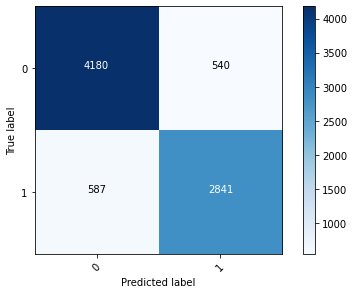

In [125]:
pretty_confusion(best_partner, df_train, target, kfolds)

[20:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


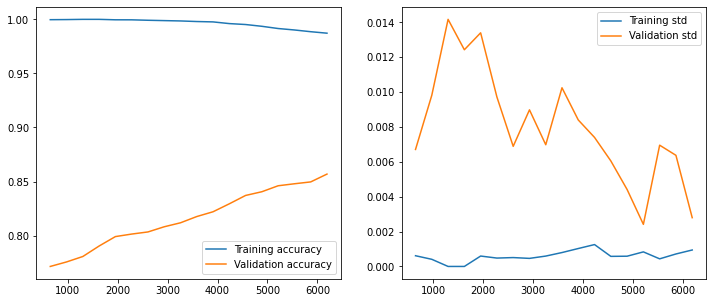

In [126]:
learning_print(best_partner, df_train, target, kfolds)

In [127]:
get_feature_importance(best_partner, df_train.columns).head(10)

,feat,score
40,like_o,0.098783
34,attr_o,0.039866
50,goal_o_Other,0.025038
46,race_o_White,0.023815
42,gender_Male,0.022911
17,sports_o,0.016882
5,vote_differently,0.016855
32,shopping_o,0.016634
8,pf_o_int,0.016614
21,museums_o,0.016524


In [128]:
get_feature_importance(best_partner, df_train.columns).tail(10)

,feat,score
48,goal_o_IdidIt,0.010455
3,with_magazine,0.010414
35,sinc_o,0.010362
13,met_o,0.010189
43,race_o_Black,0.010177
45,race_o_Other,0.009877
38,amb_o,0.008935
62,field_cd_o_Oth.,0.008782
36,intel_o,0.008088
1,order,0.007268


We notice that, as expected, just knowing who we are, what we like, and if we are enjoying the date is making the model perform significantly worse in predicting if the other person will say *yes* to us. Again, nothing really shocking but it is nice to see that the performance is the same as the one of the previous model if we drop the votes. We could interpret the result by setting to 67-70% the accuracy of predicting a *yes* for a person on a date solely by considering their characteristics and preferences and not by considering how much they are actually enjoying the date (if this makes any sense).

Interestingly, the number of dates happened before is very important for the model and, less surprisingly, how much we like and how much we value specific characteristics are very important as well.

On the other hand, race and field of study are not so important but cannot be dropped this time or we observe a drop in the score.

Again, we can see what went wrong

In [129]:
predictions_partner_only = cross_val_predict(best_partner, df_train, target, cv=kfolds)

partner_analysis = pd.concat([df_partner, 
                                   pd.DataFrame({'target':target}), 
                                   pd.DataFrame({'prediction':predictions_partner_only})], axis=1)

FP = partner_analysis[(partner_analysis.target == 0) & (partner_analysis.prediction == 1)].copy()
FN = partner_analysis[(partner_analysis.target == 1) & (partner_analysis.prediction == 0)].copy()
good_pred = partner_analysis[partner_analysis.target == partner_analysis.prediction].copy()

C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [130]:
print("Target mean for full dataset: {}".format(round(partner_analysis.target.mean(),3)))
print("Prediction mean for full dataset: {}".format(round(partner_analysis.prediction.mean(),3)))
print("Target mean for correct predictions: {}".format(round(good_pred.target.mean(),3)))

Target mean for full dataset: 0.421
Prediction mean for full dataset: 0.415
Target mean for correct predictions: 0.405


In [131]:
to_check = ['imprace_o', 'attr_o', 'prob_o', 'gender', 'goal_o', 'date_o']

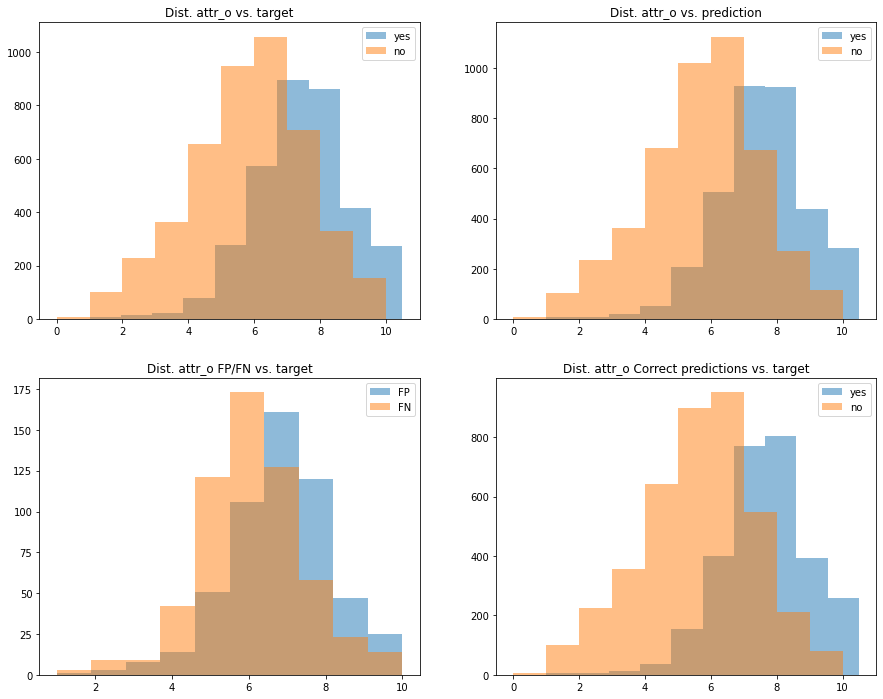

In [132]:
col = to_check[1]

fig, ax= plt.subplots(2,2, figsize=(15, 12))

partner_analysis[partner_analysis.target==1][col].hist(ax=ax[0][0], label='yes', alpha=0.5)
partner_analysis[partner_analysis.target==0][col].hist(ax=ax[0][0], label='no', alpha=0.5)
partner_analysis[partner_analysis.prediction==1][col].hist(ax=ax[0][1], label='yes', alpha=0.5)
partner_analysis[partner_analysis.prediction==0][col].hist(ax=ax[0][1], label='no', alpha=0.5)
FP[FP.target==0][col].hist(ax=ax[1][0], label='FP', alpha=0.5)
FN[FN.target==1][col].hist(ax=ax[1][0], label='FN', alpha=0.5)
good_pred[good_pred.target==1][col].hist(ax=ax[1][1], label='yes', alpha=0.5)
good_pred[good_pred.target==0][col].hist(ax=ax[1][1], label='no', alpha=0.5)
ax[0][0].set_title('Dist. '+col+' vs. target')
ax[0][1].set_title('Dist. '+col+' vs. prediction')
ax[1][0].set_title('Dist. '+col+' FP/FN vs. target')
ax[1][1].set_title('Dist. '+col+' Correct predictions vs. target')
ax[0][0].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[0][1].legend()
ax[0][0].grid(False)
ax[0][1].grid(False)
ax[1][0].grid(False)
ax[1][1].grid(False)


[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

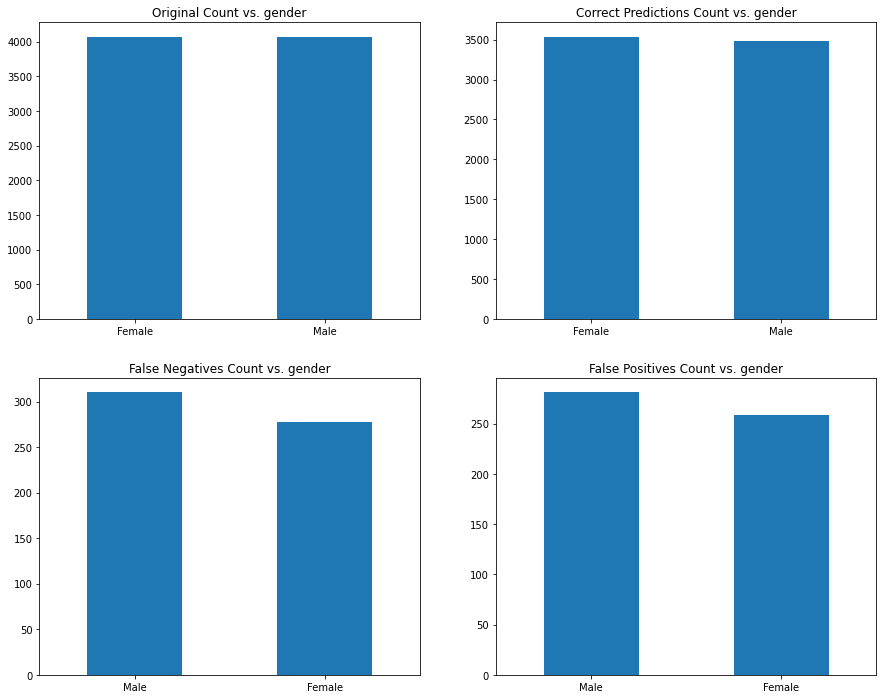

In [133]:
col = to_check[3]

fig, ax= plt.subplots(2,2, figsize=(15, 12))

partner_analysis[col].value_counts().plot(kind='bar', ax=ax[0][0])
good_pred[col].value_counts().plot(kind='bar', ax=ax[0][1])
FN[col].value_counts().plot(kind='bar', ax=ax[1][0])
FP[col].value_counts().plot(kind='bar', ax=ax[1][1])
ax[0][0].set_title('Original Count vs. '+col)
ax[0][1].set_title('Correct Predictions Count vs. '+col)
ax[1][0].set_title('False Negatives Count vs. '+col)
ax[1][1].set_title('False Positives Count vs. '+col)
ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), fontsize=10, rotation='horizontal')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), fontsize=10, rotation='horizontal')
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), fontsize=10, rotation='horizontal')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), fontsize=10, rotation='horizontal')

The model is way too pessimistic in predicting a `yes`. In particular, by knowing information about the partner only, if the participant is Female, it is most likely to have a false negative than a false positive. If the participant is male, instead, it looks is missing equally in both ways, even though it makes more mistakes.

In other words, if we are this heartless machine we make more mistakes if we have a male in front of us and we are not sure about what kind of mistake we made. On the other hand, with a female is most likely that we said `No` when we should have predicted `Yes`.

Another pattern that could be found in the mistakes of this model is about people we found *averagely attractive*  that led to many false negatives.

## Two hearts are better than one

Here we finally keep into account the entire situation, we know everything about the date and we try to see what one of the two will decide.

In [134]:
df_train = pd.get_dummies(df_both, 
                          columns=['gender', 'race', 'field_cd', 
                                   'race_o', 'field_cd_o'], 
                          drop_first=True)

# Things that help the model
del df_train['goal']
del df_train['like_spread']
del df_train['go_out_o']
del df_train['date_o']
del df_train['goal_o']
del df_train['date']
del df_train['met_comp']
del df_train['age_diff_cat']

freq_map = {'Almost_never' : 0,
           'Several_py': 1, 
           'Once_pm': 2,
           'Twice_pm': 3,
           'Once_pw': 4,
           'Twice_pw': 5,
           'Several_pw': 6}

df_train.go_out = df_train.go_out.map(freq_map)

both_cols = df_train.columns

df_train.columns.tolist()

['condtn',
 'order',
 'with_book',
 'with_magazine',
 'on_a_budget',
 'vote_differently',
 'age',
 'met',
 'imprace',
 'imprelig',
 'go_out',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'age_o',
 'met_o',
 'imprace_o',
 'imprelig_o',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'mean_liking',
 'high_like',
 'sports_o',
 'tvsports_o',
 'exercise_o',
 'dining_o',
 'museums_o',
 'art_o',
 'hiking_o',
 'gaming_o',
 'clubbing_o',
 'reading_o',
 'tv_o',
 'theater_o',
 'movies_o',
 'concerts_o',
 'music_o',
 'shopping_o',
 'yoga_o',
 '

In [135]:
pipe = Pipeline([imputer, 
                 ('xgb', XGBClassifier(n_jobs=1, random_state=42, 
                                       subsample=0.8))])

param_grid = [{'xgb__n_estimators' : [1000, 1500, 2000],
               'xgb__learning_rate': [0.1, 0.05, 0.01]}]

best_both = pretty_grid(pipe, param_grid, df_train, target,
                         'accuracy', cv=kfolds, n_jobs=-1) 

C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('imputer', SimpleImputer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=2000,
                               n_jobs=1, num_parallel_tree=1, random_state=

In [136]:
best_both.steps[-1][1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pretty_confusion(best_both, df_train, target, kfolds)

[20:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\R4YY\anaconda3\envs\pa\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
learning_print(best_both, df_train, target, kfolds)

In [ ]:
get_feature_importance(best_both, df_train.columns).head(10)

In [ ]:
get_feature_importance(best_both, df_train.columns).tail(10)

The model performs very similarly to the one with only the information about the participants and it definitely would benefit of more observations. As in the previous case, dropping the features about the participant's votes, would make the model perform significantly worse (around 74%) but still better than all the others when these features are dropped.

Again, ignoring the `like_spread` feature (which is built in the *wrong way* as discussed above) helps the model and, again, field of study and race are less important. With a larger set of features, `order` drops down in importance but stays at a spot I can't explain. Although attractiveness (see later there is a caveat with this) and general liking are still the most important predictors, now we see that the other attributes are relatively less important than before.

At last, what this one did wrong?

In [ ]:
predictions_both = cross_val_predict(best_both, df_train, target, cv=kfolds)

In [ ]:
both_analysis = pd.concat([df_both, 
                                   pd.DataFrame({'target':target}), 
                                   pd.DataFrame({'prediction':predictions_both})], axis=1)

FP = both_analysis[(both_analysis.target == 0) & (both_analysis.prediction == 1)].copy()
FN = both_analysis[(both_analysis.target == 1) & (both_analysis.prediction == 0)].copy()
good_pred = both_analysis[both_analysis.target == both_analysis.prediction].copy()

print("Target mean for full dataset: {}".format(round(both_analysis.target.mean(),3)))
print("Prediction mean for full dataset: {}".format(round(both_analysis.prediction.mean(),3)))
print("Target mean for correct predictions: {}".format(round(good_pred.target.mean(),3)))

In [ ]:
to_check = ['age_diff_cat', 'imprace_o', 'museums', 'art', 
            'clubbing','theater',  'movies', 'concerts', 
            'attr', 'sinc','like_spread','art_sh']

In [ ]:
col = to_check[8]

fig, ax= plt.subplots(2,2, figsize=(15, 12))

both_analysis[both_analysis.target==1][col].hist(ax=ax[0][0], label='yes', alpha=0.5)
both_analysis[both_analysis.target==0][col].hist(ax=ax[0][0], label='no', alpha=0.5)
both_analysis[both_analysis.prediction==1][col].hist(ax=ax[0][1], label='yes', alpha=0.5)
both_analysis[both_analysis.prediction==0][col].hist(ax=ax[0][1], label='no', alpha=0.5)
FP[FP.target==0][col].hist(ax=ax[1][0], label='FP', alpha=0.5)
FN[FN.target==1][col].hist(ax=ax[1][0], label='FN', alpha=0.5)
good_pred[good_pred.target==1][col].hist(ax=ax[1][1], label='yes', alpha=0.5)
good_pred[good_pred.target==0][col].hist(ax=ax[1][1], label='no', alpha=0.5)
ax[0][0].set_title('Dist. '+col+' vs. target')
ax[0][1].set_title('Dist. '+col+' vs. prediction')
ax[1][0].set_title('Dist. '+col+' FP/FN vs. target')
ax[1][1].set_title('Dist. '+col+' Correct predictions vs. target')
ax[0][0].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[0][1].legend()
ax[0][0].grid(False)
ax[0][1].grid(False)
ax[1][0].grid(False)
ax[1][1].grid(False)

In [ ]:
col = to_check[9]

fig, ax= plt.subplots(2,2, figsize=(15, 12))

both_analysis[both_analysis.target==1][col].hist(ax=ax[0][0], label='yes', alpha=0.5)
both_analysis[both_analysis.target==0][col].hist(ax=ax[0][0], label='no', alpha=0.5)
both_analysis[both_analysis.prediction==1][col].hist(ax=ax[0][1], label='yes', alpha=0.5)
both_analysis[both_analysis.prediction==0][col].hist(ax=ax[0][1], label='no', alpha=0.5)
FP[FP.target==0][col].hist(ax=ax[1][0], label='FP', alpha=0.5)
FN[FN.target==1][col].hist(ax=ax[1][0], label='FN', alpha=0.5)
good_pred[good_pred.target==1][col].hist(ax=ax[1][1], label='yes', alpha=0.5)
good_pred[good_pred.target==0][col].hist(ax=ax[1][1], label='no', alpha=0.5)
ax[0][0].set_title('Dist. '+col+' vs. target')
ax[0][1].set_title('Dist. '+col+' vs. prediction')
ax[1][0].set_title('Dist. '+col+' FP/FN vs. target')
ax[1][1].set_title('Dist. '+col+' Correct predictions vs. target')
ax[0][0].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[0][1].legend()
ax[0][0].grid(False)
ax[0][1].grid(False)
ax[1][0].grid(False)
ax[1][1].grid(False)

I selected these two features (but you can see how there are patterns for the others in `to_check` too) because I find interesting how the model is **overestimating the importance of attractiveness** by being more inclined that it should and falling into a relatively large number of false positives when this attribute is high and of false negatives for low values of `attr`. On the other hand, the model is **underestimating the importance of sincerity** by getting relatively more false negatives for high values of this attribute.

One might argue that this cold, heartless, machine is picking up some human habits very quickly. 

## Synthetic people in machines, making counterfactual plots.

Here we can check what these models have in common in terms of prediction and how they behave if we feed them some date between made up people.

In [ ]:
full_analysis = pd.concat([df_both,
                           pd.DataFrame({'target':target, 
                                        'pred_partic': predictions_participants_only,
                                         'pred_partner': predictions_partner_only, 
                                         'pred_both': predictions_both})], axis=1)

print("Correlation between target and models predictions")
full_analysis[['target','pred_partic', 'pred_partner', 'pred_both']].corr()

In [ ]:
print('Target mean: {}'.format(round(full_analysis.target.mean(), 2)))
print('Mean predictions of the partner model: {}'.format(round(full_analysis.pred_partner.mean(), 2)))
print('Mean predictions of the participant model: {}'.format(round(full_analysis.pred_partic.mean(), 2)))
print('Mean predictions of the full model: {}'.format(round(full_analysis.pred_both.mean(), 2)))

We see that the full model and the one taking only into consideration the data about the participants are very simila in the way they predict the decisions of the participants (being the participants' evaluations of the date the most important features, this is not surprising). Now I want to see how these models predict and if there are weird behaviors.

The idea is to take a typical date (defined in the next cell) and alter the values of each feature to spot the moment when the model changes the prediction. In other words, what does is take to make our model say `yes` or `no`. 

The typical date is the following.

In [ ]:
cats = ['condtn', 'with_book', 'with_magazine', 'on_a_budget', 
        'met', 'field_cd', 'race', 'goal', 'date', 'go_out', 'field_cd_o', 'race_o',
       'goal_o', 'date_o', 'go_out_o', 'high_like', 'samerace', 'met_comp', 
        'same_field', 'same_goal']
modes = full_analysis[cats].mode()
cats += ['gender', 'age_diff_cat']
means = pd.DataFrame(full_analysis[[col for col in full_analysis.columns if col not in cats]].mean()).transpose()
typical = pd.concat([means, modes], axis=1)
typical['gender'] = 'Male'
typical

Now, I need some helper (yet ugly) functions

In [ ]:
def both_cont_var(data, column, range_list, change_gender=None, change_race=None):
    var = []
    tmp = data.copy()
    for val in range_list:
        tmp[column] = val

        df_train = pd.get_dummies(tmp, 
                                  columns=['gender', 'race', 'field_cd', 
                                           'race_o', 'field_cd_o'])

        del df_train['goal']
        del df_train['like_spread']
        del df_train['go_out_o']
        del df_train['date_o']
        del df_train['goal_o']
        del df_train['date']
        del df_train['met_comp']

        freq_map = {'Almost_never' : 0,
                   'Several_py': 1, 
                   'Once_pm': 2,
                   'Twice_pm': 3,
                   'Once_pw': 4,
                   'Twice_pw': 5,
                   'Several_pw': 6}

        df_train.go_out = df_train.go_out.map(freq_map)

        df_train['race_Hispanic'] = 0
        df_train['race_Other'] = 0
        df_train['race_Black'] = 0
        df_train['field_cd_Educ.'] = 0
        df_train['field_cd_Eng.'] = 0
        df_train['field_cd_Film'] = 0
        df_train['field_cd_Hist.'] = 0
        df_train['field_cd_Journ.'] = 0
        df_train['field_cd_Law'] = 0
        df_train['field_cd_Math'] = 0
        df_train['field_cd_Med. Sc.'] = 0
        df_train['field_cd_Nat. Sc.'] = 0
        df_train['field_cd_Oth.'] = 0
        df_train['field_cd_Pol. Sc.'] = 0
        df_train['field_cd_Soc. Sc.'] = 0
        df_train['field_cd_Soc. Wr.'] = 0
        df_train['race_o_Hispanic'] = 0
        df_train['race_o_Other'] = 0
        df_train['race_o_Black'] = 0
        df_train['field_cd_o_Educ.'] = 0
        df_train['field_cd_o_Eng.'] = 0
        df_train['field_cd_o_Film'] = 0
        df_train['field_cd_o_Hist.'] = 0
        df_train['field_cd_o_Journ.'] = 0
        df_train['field_cd_o_Law'] = 0
        df_train['field_cd_o_Math'] = 0
        df_train['field_cd_o_Med. Sc.'] = 0
        df_train['field_cd_o_Nat. Sc.'] = 0
        df_train['field_cd_o_Oth.'] = 0
        df_train['field_cd_o_Pol. Sc.'] = 0
        df_train['field_cd_o_Soc. Sc.'] = 0
        df_train['field_cd_o_Soc. Wr.'] = 0
        
        df_train = df_train[both_cols]
        
        if change_gender:
            df_train['gender_Male'] = 0
            
        if change_race == 'Black':
            df_train['race_Hispanic'] = 0
            df_train['race_Other'] = 0
            df_train['race_Black'] = 1
            df_train['race_White'] = 0
        elif change_race == 'Other':
            df_train['race_Hispanic'] = 0
            df_train['race_Other'] = 1
            df_train['race_Black'] = 0
            df_train['race_White'] = 0
        elif change_race == 'Hispanic':
            df_train['race_Hispanic'] = 1
            df_train['race_Other'] = 0
            df_train['race_Black'] = 0
            df_train['race_White'] = 0

        var.append(best_both.predict(df_train)[0])
        
    return var


def partn_cont_var(data, column, range_list, change_gender=None, change_race=None):
    var = []
    tmp = data.copy()
    for val in range_list:
        tmp[column] = val
        df_train = pd.get_dummies(tmp, 
                                  columns=['gender', 'race_o',  'goal_o', 'field_cd_o'])

        del df_train['go_out_o']

        freq_map = {'Almost_never' : 0,
                   'Several_py': 1, 
                   'Once_pm': 2,
                   'Twice_pm': 3,
                   'Once_pw': 4,
                   'Twice_pw': 5,
                   'Several_pw': 6}

        df_train.date_o = df_train.date_o.map(freq_map)
        
        df_train['race_o_Hispanic'] = 0
        df_train['race_o_Other'] = 0
        df_train['race_o_Black'] = 0
        df_train['field_cd_o_Educ.'] = 0
        df_train['field_cd_o_Eng.'] = 0
        df_train['field_cd_o_Film'] = 0
        df_train['field_cd_o_Hist.'] = 0
        df_train['field_cd_o_Journ.'] = 0
        df_train['field_cd_o_Law'] = 0
        df_train['field_cd_o_Math'] = 0
        df_train['field_cd_o_Med. Sc.'] = 0
        df_train['field_cd_o_Nat. Sc.'] = 0
        df_train['field_cd_o_Oth.'] = 0
        df_train['field_cd_o_Pol. Sc.'] = 0
        df_train['field_cd_o_Soc. Sc.'] = 0
        df_train['field_cd_o_Soc. Wr.'] = 0
        df_train['goal_o_IdidIt'] = 0
        df_train['goal_o_Meet'] = 0
        df_train['goal_o_Other'] = 0
        df_train['goal_o_Relationship'] = 0

        df_train = df_train[col_partn]
        
        if change_gender:
            df_train['gender_Male'] = 0
            
        if change_race == 'Black':
            df_train['race_o_Hispanic'] = 0
            df_train['race_o_Other'] = 0
            df_train['race_o_Black'] = 1
            df_train['race_o_White'] = 0
        elif change_race == 'Other':
            df_train['race_o_Hispanic'] = 0
            df_train['race_o_Other'] = 1
            df_train['race_o_Black'] = 0
            df_train['race_o_White'] = 0
        elif change_race == 'Hispanic':
            df_train['race_o_Hispanic'] = 1
            df_train['race_o_Other'] = 0
            df_train['race_o_Black'] = 0
            df_train['race_o_White'] = 0

        var.append(best_partner.predict(df_train)[0])
        
    return var


def partic_cont_var(data, column, range_list, change_gender=None, change_race=None):
    var = []
    tmp = data.copy()
    for val in range_list:
        tmp[column] = val

        df_train = pd.get_dummies(data, 
                          columns=['gender'])

        del df_train['race']
        del df_train['like_spread']
        del df_train['goal']
        del df_train['field_cd']
        del df_train['with_book']
        del df_train['date'] 
        del df_train['condtn']


        freq_map = {'Almost_never' : 0,
                   'Several_py': 1, 
                   'Once_pm': 2,
                   'Twice_pm': 3,
                   'Once_pw': 4,
                   'Twice_pw': 5,
                   'Several_pw': 6}

        df_train.go_out = df_train.go_out.map(freq_map)
        
        df_train = df_train[partic_cols]
        
        if change_gender:
            df_train['gender_Male'] = 0

        var.append(best_participant.predict(df_train)[0])
        
    return var

Interestingly, all 3 models will predict `No` in the typical date described above. To see how silly they are, they say `No` regardless of the age, no matter how much we vary it (although it is not silly to say no to an 8 year old, otherwise it is a crime). Every prediction is indipendent of the gender, meaning that varying this feature never brings a change in the decision.

The model that takes into consideration only the participants will always predict `No` to every variation of the typical date. **This model is very picky**.

The other two models can change their mind in a few cases and for a few combinations of Gender and Race (meaning that if the combination is not in the next 2 graphs, the prediction remains `No`).

Here we go, **how to get a yes from a machine on a typical date**:

In [ ]:
res_hisp_black = pd.Series(both_cont_var(typical, 'like', np.arange(1, 11), change_race='Hispanic'))
res_other = pd.Series(both_cont_var(typical, 'like', np.arange(1, 11), change_race='Other'))

res_hisp_black.plot(label='Hispanic and Black', figsize=(12,6))
res_other.plot(label='Other race', figsize=(10,6))

plt.legend()
plt.title('Full model decision: like vs race', fontsize=18)
plt.xlabel('Like', fontsize=12)
plt.ylabel('Decision', fontsize=12)

In [ ]:
res_att_H_W = pd.Series(partn_cont_var(typical, 'attr_o', np.arange(1, 11), change_race='Hispanic'))
res_att_B = pd.Series(partn_cont_var(typical, 'attr_o', np.arange(1, 11), change_race='Black'))
res_att_O = pd.Series(partn_cont_var(typical, 'attr_o', np.arange(1, 11), change_race='Other'))


res_att_H_W.plot(label='Hispanic and White', figsize=(12,6))
res_att_B.plot(label='Black', figsize=(10,6))
res_att_O.plot(label='Other race', figsize=(10,6))

plt.legend()
plt.title('Partner model decision: attr_o vs race', fontsize=18)
plt.xlabel('attr_o', fontsize=12)
plt.ylabel('Decision', fontsize=12)

A model that takes into consideration both participants and partners can change its mind, but only for Hispanic and Black people that like 8 or more. While the *partner model*, the one that wants to predict the decision of someone it has no information about, relying solely on its confidence, will expect a yes only from people it judges attractive 3 at best, then it expect only `No`. In particular, it expect only very unattractive Black participants to say `yes` to it, while White and Hispanic participants can be also mildly unattactive to make it hope for a `yes`.

Very sad indeed.

We could go on but we are now at version 35 and nobody wants really keep going with this.

# Conclusions

This kernel allowed me to explore some questionnaire data about a topic we can all more or less relate to. I would like to conclude by summarizing some of the findings.

* These events attracted some segments of the population more than others, making this sample most likely not representative of the population.
* We observed a relationship between gender, race, and how important are race and religion, with the gender having a much higher weight.
* We have seen how the participants generally declared to not give much importance to race but were also generally more inclined to give positive feedback about their date if the partner was of their same race.
* People of different races like almost the same things, with some exceptions (see the subsection on interests)
* White participants are way more optimistic than their Asians counterparts.
* We have a data science-ish way of saying *I like you as a friend* 
* Participants were fairly confident before the sessions but, in rating their expectations after every date, they looked not so confident if they liked the partner, especially if they were attractive.
* How much the participant found their partners attractive (or other key attributes) is way more important of shared interest, race, and field of study.
* Not knowing how much the date is appreciated (with respect to the key attributes above) makes a machine guess the outcome of the date with significantly less accuracy. But the more you know about the partner, the better (in terms of accuracy of the prediction)
* It is more difficult to predict what an *art lover* (or movies, or clubbing) will decide after 4 minutes of date, while it is very possible, for example, for a *tv lover*.
* Predicting the decision of someone without using their information is very hard and even harder if they are males.
* Even a machine *thinks* that people will say `yes` if they find their date very attractive and `no` if they don't more than it actually happens. On the other side, it ignores how people actually like very sincere dates.
* On a typical date, these models are very negative and picky. 
* At least they behave in the same way for Males and Females and ignore almost always the race of us human to make their prediction (which can go as high as 86% in accuracy).

Thank you for reading this far, it has been a great exercise for my EDA skills and I am very glad of the support while I was drafting my 35 versions.

Please keep the feedback coming and improve this kernel as much as you like.

It has been a lot of fun for me, I hope for you too
 
 Cheers